In [ ]:
#!pip install keras.utils
#!pip install seq2seq-lstm
#!pip install -U keras
!pip install -Uqq fastbook

In [ ]:
#delete male and female in merged coz im pissed
import shutil
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/male/"
for i in range(1,771,1):
  try:
    shutil.rmtree(path+str(i))
    print(path+str(i))
  except:
    continue
    
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/female/"
for i in range(1,771,1):
  try:
    shutil.rmtree(path+str(i))
    print(path+str(i))
  except:
    continue
    
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/male/"
for i in range(1,771,1):
  try:
    shutil.rmtree(path+str(i))
    print(path+str(i))
  except:
    continue
    
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/female/"
for i in range(1,771,1):
  try:
    shutil.rmtree(path+str(i))
    print(path+str(i))
  except:
    continue

In [ ]:
os.getcwd()
#path = "/content/drive/My Drive/Colab Notebooks/Data/TrainingCropped/"
#for i in range(2,771,1):
#  os.mkdir(path+str(i))
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/male/"
for i in range(1,771,1):
  try:
    os.mkdir(path+str(i))
  except:
    print(path+str(i))
    continue
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/male/"
for i in range(1,771,1):
  try:
    os.mkdir(path+str(i))
  except:
    print(path+str(i))
    continue

In [ ]:

path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/female/"
for i in range(1,771,1):
  try:
    print(path+str(i))
    os.mkdir(path+str(i))
  except:
    print(path+str(i))
    continue
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/female/"
for i in range(1,771,1):
  try:
    os.mkdir(path+str(i))
  except:
    print(path+str(i))
    continue
  

In [ ]:

path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/female/"
for i in range(1,771,1):
  try:
    os.mkdir(path+str(i))
  except:
    print(path+str(i))
    continue
  
    
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/female/"
for i in range(1,771,1):
  try:
    os.mkdir(path+str(i))
  except:
    print(path+str(i))
    continue
  

In [ ]:
import os
path = "/content/drive/My Drive/Colab Notebooks/Data/TrainingResized/"
for i in range(1,771,1):
  os.mkdir(path+str(i))

In [ ]:
import os
import tarfile
import cv2
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/Data/haarcascade_frontalface_default.xml')
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Data/Training/1/1_1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray,1.1,4)
print(faces)
for (x, y, w, h) in faces:
    roi_color = img[y:y+h,x:x+w]
    cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Data/TrainingCropped/1/1_1.jpg',roi_color)

for i in range(1,771,1):
  for j in range(1,4,1):
    filename = str(i)+"_"+str(j)+".jpg"
    print(filename)
    img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Data/Training/'+str(i)+'/'+filename)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray,1.1,4)
    print(faces)
    for (x, y, w, h) in faces:
        roi_color = img[y:y+h,x:x+w]
        cv2.imwrite("/content/drive/My Drive/Colab Notebooks/Data/TrainingCropped/"+str(i)+"/"+filename,roi_color)
    

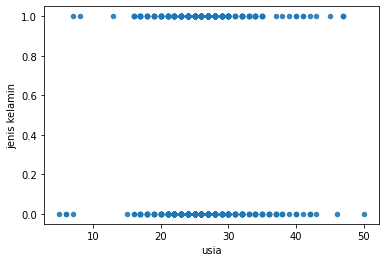

In [ ]:
#!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
training_set.plot(kind="scatter",x="usia",y="jenis kelamin",alpha=0.88)

In [ ]:
faces = training_set.copy()


In [ ]:
import pandas as pd
training_set=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/train.csv',delimiter=',')

for row in training_set.iterrows():
  print(row[1][0],end=" ") #urutan
  print(row[1][1],end=" ") #gender
  print(row[1][2]) #age
  


In [ ]:
#Random copy, 2 dari 3 foto masuk train_new, 1 nya ke valid
#Bangun model (Keras vs Fast.ai)
#Predict pake folder submission
import os
import shutil
import random
MERGE_PATH = "/content/drive/My Drive/Colab Notebooks/Data/merged"
MALE ="/male"
FEMALE ="/female"
TRAIN = "/train_new"
VALID = "/valid"
FORMER = "/content/drive/My Drive/Colab Notebooks/Data/TrainingResized"
#path train : MERGE_PATH/train_new/<sex>/folderName

files =(sorted([int(file) for file in os.listdir(FORMER)])) 
print(files)
arr_rand = [1,2,3]
valid=[]
train=[]
i = 1
for row in training_set.iterrows():
  print(row[1][0],end=" ") #urutan
  print(row[1][1],end=" ") #gender
  print(row[1][2]) #age
  SEX = MALE
  if(row[1][1]==0):
    SEX =FEMALE
  subfiles = [(file) for file in os.listdir(FORMER+"/"+str(i))]
  os.mkdir(MERGE_PATH+VALID+SEX+"/"+str(i))
  os.mkdir(MERGE_PATH+TRAIN+SEX+"/"+str(i))
  valid_idx =random.randint(0,2)
  valid_img = subfiles.pop(valid_idx)
  valid.append(valid_img)
  print(MERGE_PATH+VALID+SEX+"/"+valid_img)
  ALLPATH = MERGE_PATH+VALID+SEX+"/"+str(i)+"/"+valid_img
  shutil.copy(FORMER+"/"+str(i)+"/"+valid_img,ALLPATH)
  for file in subfiles:
    train.append(file)
    print("trained")
    ALLPATH = MERGE_PATH+TRAIN+SEX+"/"+str(i)+"/"+file
    print(ALLPATH)
    shutil.copy(FORMER+"/"+str(i)+"/"+file,ALLPATH)
  i+=1

In [ ]:
import os


path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/female/"
path1 = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/male/"
path2 = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/male/"
path3 = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/female/"
def deleteEmpties(path):
  folders=list(os.walk(path))[1::]
  for folder in folders:
    
      os.rmdir(folder[0])

deleteEmpties(path1)
deleteEmpties(path2)  
deleteEmpties(path2)

In [ ]:
import os, shutil

Preprocess

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
path = "/content/drive/My Drive/Colab Notebooks/Data/Training"
files = os.listdir("/content/drive/My Drive/Colab Notebooks/Data/Training")
Exp =  os.listdir("/content/drive/My Drive/Colab Notebooks/Data/Training")

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/female/"
path1 = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/male/"
path2 = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/male/"
path3 = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/female/"


In [ ]:
model.compile(loss="categorial_crossentropy",optimizer="Adam",metrics=["accuracy"])

path = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/female/"
path1 = "/content/drive/My Drive/Colab Notebooks/Data/merged/valid/male/"
path2 = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/male/"
path3 = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new/female/"


NameError: ignored

In [ ]:
import os
import cv2
folders = os.listdir(path3)
#path3
female=[]
for folder in folders:
 for files in os.listdir(path3+folder):
   image = cv2.imread(path3+folder+"/"+files)
   print(path3+folder+"/"+files)
   female.append(image)

In [ ]:
folders = os.listdir(path2)
#path2
male = []
for folder in folders:
 for files in os.listdir(path2+folder):
   image = cv2.imread(path2+folder+"/"+files)
   print(path2+folder+"/"+files)
   male.append(image)

In [ ]:
valid_male=[]
folders = os.listdir(path1)
#path1
for folder in folders:
 for files in os.listdir(path1+folder):
   image = cv2.imread(path1+folder+"/"+files)
   print(path1+folder+"/"+files)
   valid_male.append(image)

In [ ]:
folders = os.listdir(path)
valid_female=[]
#path
for folder in folders:
 for files in os.listdir(path+folder):
   image = cv2.imread(path+folder+"/"+files)
   print(path+folder+"/"+files)
   valid_female.append(image)

In [ ]:
print(male)

NameError: ignored

In [ ]:
print(female)

[]


In [ ]:
print(valid_male)

In [ ]:
print(valid_female)

In [ ]:
import os
import shutil
import cv2
from google.colab.patches import cv2_imshow
src = "/content/drive/My Drive/Colab Notebooks/Data/Training"
dest = "/content/drive/My Drive/Colab Notebooks/Data/TrainingResized"
files = os.listdir("/content/drive/My Drive/Colab Notebooks/Data/Training")
i = 0
images_f=np.array(images)
ages_f=[]
genders_f=[]

In [ ]:

import os
import shutil
import cv2
from google.colab.patches import cv2_imshow
src = "/content/drive/My Drive/Colab Notebooks/Data/Training"
dest = "/content/drive/My Drive/Colab Notebooks/Data/TrainingResized"
files = os.listdir("/content/drive/My Drive/Colab Notebooks/Data/Training")
i = 0
images=[]
for i in range(1,771,1):
  file_main = os.listdir(src+"/"+str(i))
  for filee in file_main:
    print(src+"/"+str(i) + "/"+filee)
    file_name = dest+"/"+str(i) + "/"+filee
    image=cv2.imread(src+"/"+str(i)+"/"+filee)
    try:
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image =cv2.resize(image,(128,128))
      images.append(image)
      cv2.imwrite(file_name,image)
    except:
      continue


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(128,128,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1,activation="sigmoid")]
)
model.summary()
model.compile(loss="binary_crossentropy",optimizer=tf.optimizers.Adam(),metrics=["accuracy"])
print("model compiled")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 256)      

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
path = "/content/drive/My Drive/Colab Notebooks/Data/merged/train_new"
path_valid="/content/drive/My Drive/Colab Notebooks/Data/merged/valid"
trainDatagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range = 0.2, fill_mode="nearest")

testDatagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range=0.2, fill_mode="nearest")

trainGen = trainDatagen.flow_from_directory(path,target_size=(128,128),batch_size=4,class_mode="binary")

validGen = testDatagen.flow_from_directory(path_valid,target_size=(128,128),batch_size=4,class_mode="binary")


Found 1540 images belonging to 2 classes.
Found 770 images belonging to 2 classes.


In [ ]:
validGen

In [ ]:
trainGen

In [ ]:
import numpy as np


model.fit(x=trainGen,epochs=30,validation_data=validGen,validation_steps=3)
model.save('/content/drive/My Drive/Colab Notebooks/sex_model')

In [ ]:
import pandas as pd
testing = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/submission.csv')
for row in testing.iterrows():
  print(row[1])

id    005093b2-8c4b-4ed7-91c3-f5f4d50f8d27
Name: 0, dtype: object
id    0052554e-069e-4c43-beb0-0885e8f7684e
Name: 1, dtype: object
id    0092b954-1143-4a95-a17b-1edfa6af3b01
Name: 2, dtype: object
id    009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16
Name: 3, dtype: object
id    00d0e306-06fe-45d8-ae6c-6f83ab8f7810
Name: 4, dtype: object
id    00f7b619-513e-4e43-bc32-ec49d233e09e
Name: 5, dtype: object
id    00fe5537-1e84-46b3-ab06-c19d8c914794
Name: 6, dtype: object
id    0111e4e4-ffbb-427b-b99f-e6162f155051
Name: 7, dtype: object
id    01122df2-dc9f-4b37-a42c-5b79318a6773
Name: 8, dtype: object
id    0193230d-b30e-487d-886e-e5bddf06ce69
Name: 9, dtype: object
id    027463b4-9766-448f-89bd-46a94d0a1404
Name: 10, dtype: object
id    029f5019-24d8-4a1d-9a72-d784a0797d6b
Name: 11, dtype: object
id    02c2f469-b0ea-4f37-8cda-fdea8120216f
Name: 12, dtype: object
id    02d7a2cf-5782-4b96-9163-edbefcec1669
Name: 13, dtype: object
id    03722cb3-6351-40b5-a5cb-acb6bb0e6640
Name: 14, dtype: object
id   

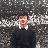

[(0, id    005093b2-8c4b-4ed7-91c3-f5f4d50f8d27
Name: 0, dtype: object), 1]
male


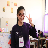

[(1, id    0052554e-069e-4c43-beb0-0885e8f7684e
Name: 1, dtype: object), 1]
male


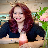

[(2, id    0092b954-1143-4a95-a17b-1edfa6af3b01
Name: 2, dtype: object), 0]
female


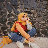

[(3, id    009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16
Name: 3, dtype: object), 1]
male


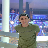

[(4, id    00d0e306-06fe-45d8-ae6c-6f83ab8f7810
Name: 4, dtype: object), 1]
male


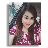

[(5, id    00f7b619-513e-4e43-bc32-ec49d233e09e
Name: 5, dtype: object), 0]
female


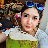

[(6, id    00fe5537-1e84-46b3-ab06-c19d8c914794
Name: 6, dtype: object), 1]
male


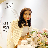

[(7, id    0111e4e4-ffbb-427b-b99f-e6162f155051
Name: 7, dtype: object), 0]
female


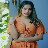

[(8, id    01122df2-dc9f-4b37-a42c-5b79318a6773
Name: 8, dtype: object), 1]
male


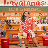

[(9, id    0193230d-b30e-487d-886e-e5bddf06ce69
Name: 9, dtype: object), 1]
male


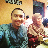

[(10, id    027463b4-9766-448f-89bd-46a94d0a1404
Name: 10, dtype: object), 1]
male


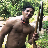

[(11, id    029f5019-24d8-4a1d-9a72-d784a0797d6b
Name: 11, dtype: object), 1]
male


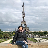

[(12, id    02c2f469-b0ea-4f37-8cda-fdea8120216f
Name: 12, dtype: object), 1]
male


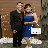

[(13, id    02d7a2cf-5782-4b96-9163-edbefcec1669
Name: 13, dtype: object), 1]
male


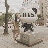

[(14, id    03722cb3-6351-40b5-a5cb-acb6bb0e6640
Name: 14, dtype: object), 1]
male


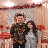

[(15, id    03892369-b6b5-48fc-b52f-a7d39912471d
Name: 15, dtype: object), 1]
male


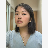

[(16, id    039b0174-f6b6-441e-91a0-58da408264e0
Name: 16, dtype: object), 1]
male


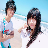

[(17, id    03dc3f2f-a094-452b-b3d5-3a51b58c19c2
Name: 17, dtype: object), 0]
female


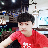

[(18, id    03f672ec-2b62-4448-81aa-98813df4d3fe
Name: 18, dtype: object), 1]
male


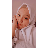

[(19, id    0476a68a-435d-42ee-9074-2dfde14bb281
Name: 19, dtype: object), 1]
male


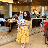

[(20, id    05172e12-70e1-4c8b-b6e7-645f8be13279
Name: 20, dtype: object), 1]
male


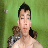

[(21, id    05554516-00c7-455f-94a1-51e9466cdce6
Name: 21, dtype: object), 1]
male


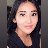

[(22, id    056787a3-6ceb-454c-a22d-c0528c9c47f3
Name: 22, dtype: object), 1]
male


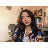

[(23, id    062e0f22-234b-41e3-9ac9-47e74d8c257f
Name: 23, dtype: object), 1]
male


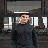

[(24, id    06544507-f0a2-40e3-8b2f-213a374422f6
Name: 24, dtype: object), 1]
male


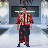

[(25, id    06740dd0-60be-4893-9d92-10c489c2747e
Name: 25, dtype: object), 0]
female


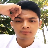

[(26, id    06dce419-ddf4-46a2-825e-ec81afdd2891
Name: 26, dtype: object), 1]
male


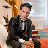

[(27, id    070bfc21-d964-4ca2-86f0-06c0449c4af5
Name: 27, dtype: object), 1]
male


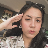

[(28, id    072a3121-79f3-4aa6-840e-96d6cfe08bf2
Name: 28, dtype: object), 1]
male


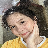

[(29, id    0770c5a2-e4ac-41de-a49d-75dd985bd2db
Name: 29, dtype: object), 1]
male


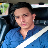

[(30, id    077745c0-7719-4310-833c-39d7ff7a7611
Name: 30, dtype: object), 1]
male


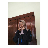

[(31, id    07b381c8-5d7e-4502-9db5-253d5ef9498f
Name: 31, dtype: object), 0]
female


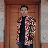

[(32, id    07d92610-ac8d-444e-8ece-34255ee1f197
Name: 32, dtype: object), 1]
male


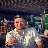

[(33, id    083cf9d8-5ec0-4702-9136-1328f64c1956
Name: 33, dtype: object), 1]
male


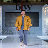

[(34, id    0880e66a-032c-40a4-91d6-01296f32954d
Name: 34, dtype: object), 1]
male


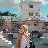

[(35, id    08886938-b182-46d6-a445-64c78a541d50
Name: 35, dtype: object), 1]
male


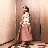

[(36, id    089c8583-7d64-4545-9464-d9399817b8da
Name: 36, dtype: object), 1]
male


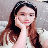

[(37, id    08c6b797-fea1-4edb-bfb1-2e9342f70b2e
Name: 37, dtype: object), 1]
male


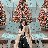

[(38, id    09349e8f-47d8-4e5e-9225-8c194b6b683c
Name: 38, dtype: object), 0]
female


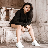

[(39, id    094a78c8-f45b-461f-a698-191c6225840f
Name: 39, dtype: object), 0]
female


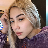

[(40, id    0953eb57-eb45-46f3-88b5-794cf955008c
Name: 40, dtype: object), 1]
male


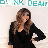

[(41, id    09a783fa-fbe8-45dd-8658-720d8a6c030a
Name: 41, dtype: object), 1]
male


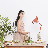

[(42, id    09b6023a-1fba-4f29-b13f-0537b9f00412
Name: 42, dtype: object), 0]
female


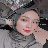

[(43, id    09c52a8b-834d-46c9-ac31-b4306e57ae04
Name: 43, dtype: object), 1]
male


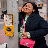

[(44, id    0a4b579b-6f5c-453a-8d4b-389e6fc6ec36
Name: 44, dtype: object), 1]
male


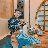

[(45, id    0a59a0b9-aa41-4f21-bd25-a4a8bdd362c4
Name: 45, dtype: object), 0]
female


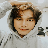

[(46, id    0b1b8d0e-8a2b-47c5-aa40-f2a452c08413
Name: 46, dtype: object), 0]
female


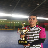

[(47, id    0b624c5d-c72d-498f-8e08-fcc01cae7b17
Name: 47, dtype: object), 1]
male


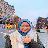

[(48, id    0b720867-1809-46c0-9008-5ff77d99dd6f
Name: 48, dtype: object), 1]
male


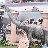

[(49, id    0bf9b43e-fd13-4ef9-b423-5a3d43fec20f
Name: 49, dtype: object), 1]
male


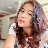

[(50, id    0c0d128e-1b0c-45b1-9740-1ad4bb00b203
Name: 50, dtype: object), 1]
male


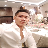

[(51, id    0c105e15-4a41-4591-920a-6ae54a89ce78
Name: 51, dtype: object), 0]
female


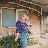

[(52, id    0c841720-7b33-4d4e-a413-14f69afe85ed
Name: 52, dtype: object), 0]
female


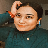

[(53, id    0c9ddc23-4225-44f0-9c6e-0d0c6f317530
Name: 53, dtype: object), 1]
male


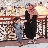

[(54, id    0db77c32-10cc-4595-84e6-90c37678f518
Name: 54, dtype: object), 1]
male


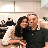

[(55, id    0e5902d8-1ea5-4529-9c87-8d537240e63f
Name: 55, dtype: object), 1]
male


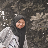

[(56, id    0e7fd5dd-b394-4ce2-b22c-1d6a72de13f9
Name: 56, dtype: object), 1]
male


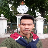

[(57, id    0e86fa4a-6e3c-4253-803a-c0ede7ec03d6
Name: 57, dtype: object), 1]
male


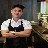

[(58, id    0ebc4300-1fe7-44f8-b5ac-99b5f483c82e
Name: 58, dtype: object), 1]
male


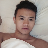

[(59, id    0ed1f17e-c939-409a-8037-2e066a9ccebf
Name: 59, dtype: object), 0]
female


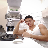

[(60, id    0efd6ff7-9e4f-4326-af44-7545067cbf0a
Name: 60, dtype: object), 1]
male


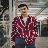

[(61, id    10305250-4e38-47da-97e9-61ef120bebe1
Name: 61, dtype: object), 1]
male


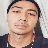

[(62, id    10a276a2-a0a6-4b8e-9df9-4de596a6cb10
Name: 62, dtype: object), 0]
female


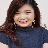

[(63, id    1125f8aa-1660-45fc-a4b5-3479421fc74c
Name: 63, dtype: object), 0]
female


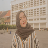

[(64, id    116b3ed8-4838-4f22-b592-aa5470abca84
Name: 64, dtype: object), 0]
female


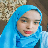

[(65, id    116cb5e6-c6af-467b-8a66-030e343a2aa4
Name: 65, dtype: object), 1]
male


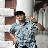

[(66, id    11727669-f61c-4222-9775-b2858f44e245
Name: 66, dtype: object), 0]
female


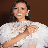

[(67, id    11fbcc76-f088-4791-bdf9-80fda89e9a92
Name: 67, dtype: object), 0]
female


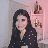

[(68, id    11fc687e-8c2a-4cea-b80a-4e772c272cff
Name: 68, dtype: object), 0]
female


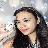

[(69, id    1211b58d-1907-41c5-9718-c3db2ca87bae
Name: 69, dtype: object), 1]
male


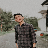

[(70, id    12761905-1abf-4d92-990e-9fe90972273d
Name: 70, dtype: object), 1]
male


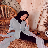

[(71, id    128d2964-ab43-4f8c-8136-5e1f55a4b7ad
Name: 71, dtype: object), 0]
female


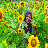

[(72, id    12955bff-7a1c-4ef5-b5a5-e25917da0fc4
Name: 72, dtype: object), 1]
male


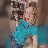

[(73, id    12bc21b4-eb05-48cf-bc05-fb27f157af5d
Name: 73, dtype: object), 0]
female


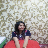

[(74, id    12f48394-7346-4b42-912b-020d3aeb093f
Name: 74, dtype: object), 1]
male


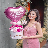

[(75, id    13b3de4f-a67b-428b-9455-98aab463cd2c
Name: 75, dtype: object), 0]
female


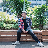

[(76, id    14006bfb-2fc0-48c5-b498-560bddf7a15f
Name: 76, dtype: object), 1]
male


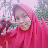

[(77, id    1478aa96-9c8e-4d2c-8355-02b3a5e9c346
Name: 77, dtype: object), 1]
male


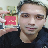

[(78, id    148e842b-cbe8-4c10-82df-836f70d89097
Name: 78, dtype: object), 1]
male


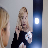

[(79, id    1565a3bb-6c93-426f-8b3e-15ea5991e435
Name: 79, dtype: object), 1]
male


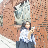

[(80, id    1579e65a-d992-41bb-b389-0f6f75dee6d0
Name: 80, dtype: object), 1]
male


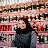

[(81, id    15e4c334-683e-4ccd-8ae0-51ec90cf341d
Name: 81, dtype: object), 1]
male


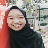

[(82, id    16195d2b-5961-4114-b471-f9d698857893
Name: 82, dtype: object), 0]
female


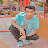

[(83, id    16f7a2ce-1eca-40b5-a43e-4a5346fa1c47
Name: 83, dtype: object), 1]
male


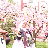

[(84, id    17251973-8b9f-4346-8992-94d7811463d4
Name: 84, dtype: object), 1]
male


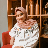

[(85, id    174e7c7d-6193-438e-803e-773cae1caca0
Name: 85, dtype: object), 0]
female


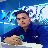

[(86, id    1832b7c0-adc8-46d1-ab0c-5c0ea7f8532f
Name: 86, dtype: object), 0]
female


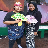

[(87, id    183c1328-221d-455e-bffd-0a724fd75ff1
Name: 87, dtype: object), 1]
male


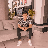

[(88, id    1840b373-1513-4083-8237-ec20b1c28d05
Name: 88, dtype: object), 0]
female


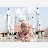

[(89, id    18bf851b-0efd-47ab-a8e3-e490b5161036
Name: 89, dtype: object), 1]
male


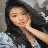

[(90, id    191099e3-6b46-4a07-b0bd-1ab98b2d9834
Name: 90, dtype: object), 1]
male


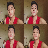

[(91, id    1918c828-6f4f-4934-bff3-69c13fbd264f
Name: 91, dtype: object), 0]
female


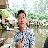

[(92, id    193f4bc5-fa9c-48fd-b9f8-cafff3ad55cb
Name: 92, dtype: object), 1]
male


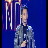

[(93, id    196cf362-ab20-4945-8f9c-a5e2841e3836
Name: 93, dtype: object), 0]
female


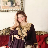

[(94, id    1a1c38da-f1f2-4177-bda9-6c308928c5d2
Name: 94, dtype: object), 1]
male


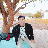

[(95, id    1a7c82f3-f6be-4b13-8ddf-4b7d45f0d6cd
Name: 95, dtype: object), 1]
male


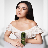

[(96, id    1a8e591c-f663-46ec-8a8f-da024380e16d
Name: 96, dtype: object), 0]
female


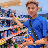

[(97, id    1aa64983-5b43-417e-b301-220447560e68
Name: 97, dtype: object), 1]
male


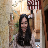

[(98, id    1af9a733-2bf0-4f23-944f-2d3a31ac0f2a
Name: 98, dtype: object), 0]
female


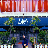

[(99, id    1aff9471-2a02-47dc-bda1-fd10452f1d41
Name: 99, dtype: object), 1]
male


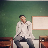

[(100, id    1b515a2d-36b5-448e-a023-8532d83b5377
Name: 100, dtype: object), 1]
male


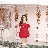

[(101, id    1b73e7b8-de3d-4124-be6c-9d522c94cb4c
Name: 101, dtype: object), 0]
female


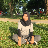

[(102, id    1bb6d506-1a00-4ee8-b82a-3deb69b3c72a
Name: 102, dtype: object), 1]
male


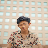

[(103, id    1c0a9850-e013-4256-afc0-bae636a145dd
Name: 103, dtype: object), 1]
male


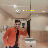

[(104, id    1d1c6997-d261-429a-9c12-0c28a32c44e9
Name: 104, dtype: object), 1]
male


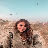

[(105, id    1e00cbcc-30d2-436e-92ba-271ec859c4c6
Name: 105, dtype: object), 1]
male


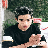

[(106, id    1e0eaa4d-4617-4f03-821c-20c121e3d00d
Name: 106, dtype: object), 1]
male


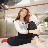

[(107, id    1e88f974-8b75-4cf6-a970-189d33d9728e
Name: 107, dtype: object), 0]
female


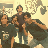

[(108, id    1ea2609a-78a8-4d00-ab20-290c8b7b6bfa
Name: 108, dtype: object), 1]
male


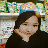

[(109, id    1ee8e78a-4706-4171-9518-edb19faa4a89
Name: 109, dtype: object), 0]
female


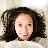

[(110, id    1f4467db-97a5-42d1-b072-ba61351be6ef
Name: 110, dtype: object), 1]
male


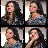

[(111, id    1faa6a4b-e99c-4a88-959f-ce0a780858f0
Name: 111, dtype: object), 0]
female


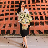

[(112, id    1fd1cbf1-3d81-4e8f-a3e1-d747717fa371
Name: 112, dtype: object), 1]
male


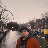

[(113, id    1fd40328-fd69-4157-8934-e3af00d31d48
Name: 113, dtype: object), 0]
female


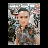

[(114, id    201d2660-0b63-4768-97aa-8bb04133df43
Name: 114, dtype: object), 0]
female


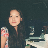

[(115, id    20273b6c-e609-42bf-a462-118c0d8a4459
Name: 115, dtype: object), 1]
male


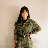

[(116, id    20d45621-cf25-4ee7-83f3-e8caba57e58a
Name: 116, dtype: object), 0]
female


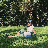

[(117, id    20d5b5dc-01de-46c6-83ab-15e3819999b6
Name: 117, dtype: object), 1]
male


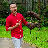

[(118, id    2115704b-6a2a-479c-8da4-493ee265dbab
Name: 118, dtype: object), 1]
male


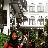

[(119, id    21af6077-3af4-4405-9c0d-0c23bdcbf408
Name: 119, dtype: object), 1]
male


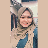

[(120, id    21bd3f45-9f87-4410-ad36-1db76c376e34
Name: 120, dtype: object), 1]
male


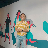

[(121, id    21cec38c-f1ee-4e09-9a69-bb65d7413962
Name: 121, dtype: object), 0]
female


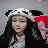

[(122, id    220144ff-8aa8-44b2-8542-fdb68a654918
Name: 122, dtype: object), 0]
female


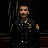

[(123, id    229ca9f8-5c62-426b-a245-b933001773ab
Name: 123, dtype: object), 0]
female


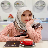

[(124, id    22d88489-9e24-4648-85ac-ff1a1ca96558
Name: 124, dtype: object), 1]
male


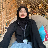

[(125, id    22f95567-421a-4b53-bc34-f3409598b66d
Name: 125, dtype: object), 0]
female


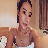

[(126, id    23020070-5cad-4b53-a64c-e8c4dc0b5b10
Name: 126, dtype: object), 0]
female


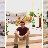

[(127, id    235cfffa-6f94-41ef-902e-7eff2d273bba
Name: 127, dtype: object), 0]
female


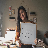

[(128, id    239731f1-9c91-450f-9172-af960ece6450
Name: 128, dtype: object), 1]
male


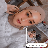

[(129, id    23f2dc19-3fba-404d-9f32-5490c5edff60
Name: 129, dtype: object), 0]
female


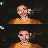

[(130, id    244f07b7-4e2f-4c94-a3dd-d2486d432279
Name: 130, dtype: object), 1]
male


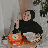

[(131, id    24aaa5d4-b7cb-43f7-9f21-e6e81984f524
Name: 131, dtype: object), 1]
male


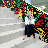

[(132, id    24d299ef-d9aa-482f-a56b-06e193bb2575
Name: 132, dtype: object), 0]
female


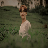

[(133, id    256e3450-97e9-4f00-bb7e-5e069fb3736e
Name: 133, dtype: object), 0]
female


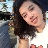

[(134, id    25814597-fb75-40fa-881f-3ce67dae1c24
Name: 134, dtype: object), 1]
male


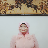

[(135, id    25e2949a-aaa6-4dec-aee7-9577ee51cec4
Name: 135, dtype: object), 1]
male


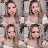

[(136, id    26caab07-a7b3-4653-a8c8-8a5fb880387d
Name: 136, dtype: object), 0]
female


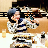

[(137, id    274ec327-d4bb-4850-bfcf-9388b158d307
Name: 137, dtype: object), 1]
male


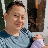

[(138, id    278bd540-bf86-410f-82e9-737a89859113
Name: 138, dtype: object), 1]
male


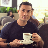

[(139, id    27e18203-ce1c-45e4-9fb7-61866d4d1b4c
Name: 139, dtype: object), 1]
male


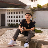

[(140, id    28384496-d865-4b95-a402-ae74c8cb6229
Name: 140, dtype: object), 1]
male


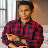

[(141, id    28608735-cc46-42c4-9425-ff820295fd76
Name: 141, dtype: object), 1]
male


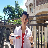

[(142, id    288b5d2a-305a-4b16-b1b3-d13d69536c8e
Name: 142, dtype: object), 0]
female


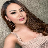

[(143, id    288b63cc-0fcb-4369-a497-4f0d5924e522
Name: 143, dtype: object), 1]
male


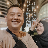

[(144, id    28ac1c7e-1d25-4890-a9a5-f706274c9b5d
Name: 144, dtype: object), 0]
female


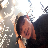

[(145, id    2909b21f-8862-4def-96a9-adc0d37372bc
Name: 145, dtype: object), 1]
male


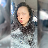

[(146, id    292521e4-5f98-43ec-8a7a-ccff5ab8466b
Name: 146, dtype: object), 0]
female


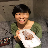

[(147, id    2945e205-bc40-41a8-a322-6ce7e0db9b28
Name: 147, dtype: object), 0]
female


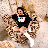

[(148, id    29869b6b-7a20-4c18-8f04-d780cf8dd2ba
Name: 148, dtype: object), 0]
female


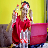

[(149, id    29d55df9-af61-47b0-aa04-388e1ab8d557
Name: 149, dtype: object), 1]
male


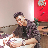

[(150, id    2a30c191-9194-4aac-9ad1-f8f3610ee102
Name: 150, dtype: object), 0]
female


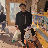

[(151, id    2a4fab7e-3302-4eb1-8ba8-76bfed5ac9c3
Name: 151, dtype: object), 1]
male


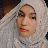

[(152, id    2a5a0dec-6181-46d4-8c58-6e2048a06be4
Name: 152, dtype: object), 1]
male


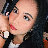

[(153, id    2b13e550-2d56-41e3-8111-1d484e208589
Name: 153, dtype: object), 1]
male


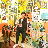

[(154, id    2b189ea5-bd22-4474-9e0c-d0bc6101e070
Name: 154, dtype: object), 1]
male


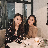

[(155, id    2b56e95c-7565-4104-b30f-49b5b3b125ff
Name: 155, dtype: object), 1]
male


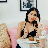

[(156, id    2b8d80c3-8d49-472d-8821-791d98e6beb2
Name: 156, dtype: object), 1]
male


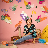

[(157, id    2baf6c68-1390-4617-8a19-e22a58e74c07
Name: 157, dtype: object), 1]
male


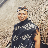

[(158, id    2bffdc78-51f5-4dea-9dfe-4f5eadfd2ec5
Name: 158, dtype: object), 1]
male


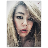

[(159, id    2c10fa59-c0b1-41fa-b4ae-ef474036279c
Name: 159, dtype: object), 0]
female


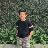

[(160, id    2c18c4f8-4853-41b9-9012-0c605aac34d0
Name: 160, dtype: object), 1]
male


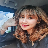

[(161, id    2c5f597b-cc64-4bef-9718-689333a6c8f6
Name: 161, dtype: object), 1]
male


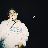

[(162, id    2c91e4b1-773e-4ad0-b784-6580bdd3849f
Name: 162, dtype: object), 1]
male


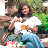

[(163, id    2ce645c9-2215-4d02-a995-1874313af9bb
Name: 163, dtype: object), 1]
male


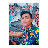

[(164, id    2cfb61aa-53bb-44e4-a64f-8430243f8df2
Name: 164, dtype: object), 1]
male


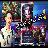

[(165, id    2d0b25cf-ea3a-4237-b696-1831e7ec1ef2
Name: 165, dtype: object), 1]
male


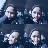

[(166, id    2d486806-57e9-4bf0-b1e5-7c443bb462ef
Name: 166, dtype: object), 1]
male


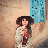

[(167, id    2d896598-a406-40bd-856b-28d68975b3c5
Name: 167, dtype: object), 1]
male


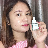

[(168, id    2da801bc-6198-45c9-9e53-d710672069e1
Name: 168, dtype: object), 1]
male


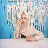

[(169, id    2dae50e3-f1c4-4139-8e1b-2066db4ab6a3
Name: 169, dtype: object), 0]
female


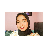

[(170, id    2dcf97f3-9b18-49e7-9999-e06bbada6302
Name: 170, dtype: object), 0]
female


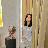

[(171, id    2df46820-db56-455e-9727-3352c58a473d
Name: 171, dtype: object), 1]
male


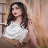

[(172, id    2e4c7bee-15d6-407c-8bd5-1bd4700f8bd0
Name: 172, dtype: object), 0]
female


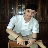

[(173, id    2e693eae-3438-4dc7-86a2-7665a9ea05cf
Name: 173, dtype: object), 1]
male


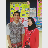

[(174, id    2e696b7c-60ba-4c12-971a-8bbba37f2e19
Name: 174, dtype: object), 1]
male


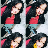

[(175, id    2e98d4b0-946b-48e6-b697-c88fdb6d30c8
Name: 175, dtype: object), 0]
female


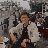

[(176, id    2ecad554-3d62-461f-97f3-0670b522a9b1
Name: 176, dtype: object), 1]
male


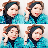

[(177, id    2f257d80-4546-4cdd-8cf3-653d35095022
Name: 177, dtype: object), 1]
male


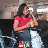

[(178, id    2f296dc8-c48f-4316-ad49-9f39524b5b20
Name: 178, dtype: object), 1]
male


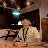

[(179, id    2f8b0a5a-7b44-42c6-8632-b62aeaa6f0e8
Name: 179, dtype: object), 1]
male


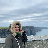

[(180, id    2f8ba837-41df-4e1e-adb6-76e56749a7b4
Name: 180, dtype: object), 1]
male


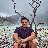

[(181, id    2fa3244f-80f4-4450-9291-8b48f68c3953
Name: 181, dtype: object), 1]
male


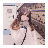

[(182, id    2fc4a1fa-95a7-4bdb-9154-8f3968bd8595
Name: 182, dtype: object), 0]
female


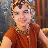

[(183, id    3006d48c-9cd1-43f9-ae65-bdc7418bc270
Name: 183, dtype: object), 1]
male


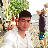

[(184, id    3056f7de-374e-462a-82dd-59298cdf6817
Name: 184, dtype: object), 0]
female


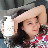

[(185, id    30c518ea-78af-4554-9c24-c264d59e3f63
Name: 185, dtype: object), 0]
female


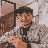

[(186, id    3137935e-3aca-4724-a393-d672afa01afc
Name: 186, dtype: object), 0]
female


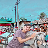

[(187, id    3163e129-645d-48e9-9e67-72d5834e232a
Name: 187, dtype: object), 1]
male


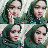

[(188, id    316c5e03-dae4-4b29-b30c-5c606acce6ba
Name: 188, dtype: object), 1]
male


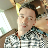

[(189, id    31a07f71-b3f9-4d25-b1c5-eda686598999
Name: 189, dtype: object), 1]
male


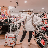

[(190, id    31c1bcd8-7adf-4904-b636-49f501e0a6a0
Name: 190, dtype: object), 1]
male


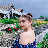

[(191, id    31dff8b7-3e9a-40f2-8cd6-9c601340e6f1
Name: 191, dtype: object), 1]
male


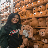

[(192, id    31f8fcd3-442e-4cb4-af18-c695b45175af
Name: 192, dtype: object), 0]
female


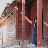

[(193, id    31f9964d-a611-4905-947c-847f93feb14e
Name: 193, dtype: object), 0]
female


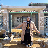

[(194, id    3218e6bd-2831-4178-9916-31e55d2b0004
Name: 194, dtype: object), 1]
male


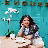

[(195, id    3230cdce-88c8-48d4-98b4-1d37885f27c2
Name: 195, dtype: object), 1]
male


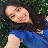

[(196, id    327675df-4bc1-4990-9ec9-447dcdc41e6f
Name: 196, dtype: object), 0]
female


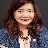

[(197, id    32ada99d-98ff-4545-b52c-192cf436403a
Name: 197, dtype: object), 1]
male


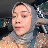

[(198, id    32c772b3-73b7-4336-939f-100590016027
Name: 198, dtype: object), 0]
female


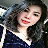

[(199, id    330251e5-8f0b-4f77-8f7d-36cf582bf3f4
Name: 199, dtype: object), 0]
female


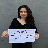

[(200, id    3350019a-b306-4971-a7de-c1c2cbea36c3
Name: 200, dtype: object), 1]
male


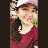

[(201, id    34c8a18d-6c39-4b6c-a9e8-1d560ae911dd
Name: 201, dtype: object), 1]
male


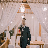

[(202, id    352bedad-cb1e-4e3a-9211-952970759225
Name: 202, dtype: object), 1]
male


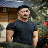

[(203, id    3569284a-c92f-4e64-af21-b2d3f921870c
Name: 203, dtype: object), 1]
male


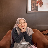

[(204, id    35d9a0df-056f-45a0-a658-9abbc93ec1ef
Name: 204, dtype: object), 1]
male


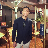

[(205, id    361e6990-fc6e-4ae4-8b46-ce5fb1b057e4
Name: 205, dtype: object), 0]
female


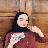

[(206, id    362140a4-4c59-495e-9004-c3489b455eb0
Name: 206, dtype: object), 1]
male


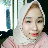

[(207, id    364b7ddb-1298-4ead-bad0-12b8378e4792
Name: 207, dtype: object), 0]
female


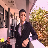

[(208, id    3651301a-e506-493c-bbfc-56d5df570afe
Name: 208, dtype: object), 1]
male


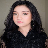

[(209, id    365e4603-e3d4-4e0f-9cb7-451592ea256a
Name: 209, dtype: object), 1]
male


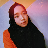

[(210, id    36ce4efd-fff2-4035-bbf0-803a831ef499
Name: 210, dtype: object), 0]
female


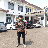

[(211, id    36fcda22-ac3b-4da2-9671-129442c05d9a
Name: 211, dtype: object), 1]
male


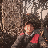

[(212, id    3746e775-c93e-480b-b050-e7ce55eceacd
Name: 212, dtype: object), 0]
female


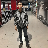

[(213, id    378fc8f5-bb9b-4f51-8648-6cdb5e831f68
Name: 213, dtype: object), 1]
male


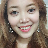

[(214, id    37e5b715-e737-4938-8d24-67bc02e81f0a
Name: 214, dtype: object), 1]
male


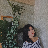

[(215, id    38c9b176-ff7c-4536-88b9-e7c3883d4248
Name: 215, dtype: object), 1]
male


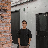

[(216, id    38d0bbce-9ec5-4d74-8f27-d480316ca9d8
Name: 216, dtype: object), 1]
male


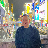

[(217, id    38fa8435-b9b0-48d8-afbc-9dd5d1b45291
Name: 217, dtype: object), 0]
female


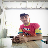

[(218, id    390a64cc-ab44-44ce-9f01-90ab9e33d584
Name: 218, dtype: object), 1]
male


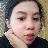

[(219, id    391a9586-c257-4d96-b5dd-098afb0ed677
Name: 219, dtype: object), 1]
male


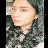

[(220, id    394de98e-288c-40ef-97ed-95e26da08393
Name: 220, dtype: object), 0]
female


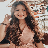

[(221, id    3a5d3402-a22c-472b-92f7-68fdcd6525ac
Name: 221, dtype: object), 1]
male


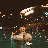

[(222, id    3a7da8f4-7c67-47f0-aa92-4f2fee429b17
Name: 222, dtype: object), 1]
male


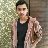

[(223, id    3add3bc8-89ac-41ea-b3f0-e451ae53429d
Name: 223, dtype: object), 1]
male


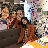

[(224, id    3b52c4b1-b86b-4906-bb9d-bb67eca324af
Name: 224, dtype: object), 1]
male


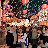

[(225, id    3bcc6063-9470-4eab-b541-885101219066
Name: 225, dtype: object), 1]
male


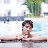

[(226, id    3c0c9ece-e851-4031-92e2-02a19cac168b
Name: 226, dtype: object), 0]
female


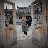

[(227, id    3c243742-dd30-4a2c-94eb-9d23cc13983d
Name: 227, dtype: object), 0]
female


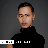

[(228, id    3c435cf1-be9f-4219-8feb-fd51f9dfb433
Name: 228, dtype: object), 1]
male


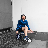

[(229, id    3c58692a-cd16-4d08-9778-1641b1880912
Name: 229, dtype: object), 1]
male


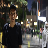

[(230, id    3ce51bb5-8af8-4003-b35b-afb22d542bc1
Name: 230, dtype: object), 1]
male


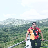

[(231, id    3cebe1a1-d801-4241-81a9-3449ece736c2
Name: 231, dtype: object), 1]
male


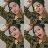

[(232, id    3cf97594-5980-4d89-bb9d-0f0e7a4d2121
Name: 232, dtype: object), 1]
male


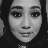

[(233, id    3d10ead8-ac4a-4373-b439-8c207bc42c71
Name: 233, dtype: object), 1]
male


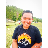

[(234, id    3d4cc141-58ee-4d42-8bd8-a4541fa58490
Name: 234, dtype: object), 1]
male


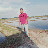

[(235, id    3d551030-15d4-40b3-bef0-c5dd70f9e982
Name: 235, dtype: object), 0]
female


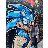

[(236, id    3d6171d7-d21c-45fd-9f68-7945a79f4737
Name: 236, dtype: object), 0]
female


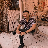

[(237, id    3def24a8-7cf8-4aa1-85db-96be5e120301
Name: 237, dtype: object), 1]
male


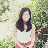

[(238, id    3e393469-74f4-4733-81c7-26c6a796737d
Name: 238, dtype: object), 1]
male


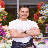

[(239, id    3e6e021f-55ac-4d6b-b03a-599ab3e1b053
Name: 239, dtype: object), 1]
male


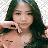

[(240, id    3e78e68f-9b07-4988-8a52-6c13ef18bdc3
Name: 240, dtype: object), 1]
male


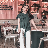

[(241, id    3eace7ba-d212-43ba-b72a-4e9851413d31
Name: 241, dtype: object), 1]
male


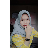

[(242, id    3f2a365d-231c-46f0-b113-3ff1babbfa15
Name: 242, dtype: object), 1]
male


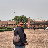

[(243, id    3f79301d-da62-4181-a79c-61f7edddee7f
Name: 243, dtype: object), 1]
male


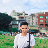

[(244, id    3fdd0f27-1d2b-49c6-a9ff-92bc559bc49d
Name: 244, dtype: object), 1]
male


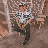

[(245, id    3ff7a9e6-088c-408f-ae3e-26e6d7a2bbff
Name: 245, dtype: object), 0]
female


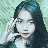

[(246, id    402fc04b-2e77-4835-a905-7e02808bbf9f
Name: 246, dtype: object), 0]
female


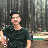

[(247, id    40a32830-5941-4d71-ba16-f8c4816176f5
Name: 247, dtype: object), 0]
female


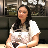

[(248, id    40a96c2e-c41b-4f9c-84e4-29ccfd2155a2
Name: 248, dtype: object), 1]
male


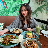

[(249, id    40b7de23-06ba-4dbd-8950-07151b806d2e
Name: 249, dtype: object), 1]
male


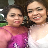

[(250, id    40d0f94b-3d5b-43d3-bcd8-7a27ed8ec3fd
Name: 250, dtype: object), 1]
male


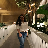

[(251, id    40e8f520-5585-4b72-8fce-b46d743dc257
Name: 251, dtype: object), 0]
female


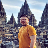

[(252, id    41274620-353d-494f-b2c8-dbd404138b50
Name: 252, dtype: object), 1]
male


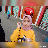

[(253, id    413f6b33-97a0-4497-9437-abb7caad6f55
Name: 253, dtype: object), 0]
female


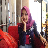

[(254, id    41552df6-0124-46ea-ab53-81c78eeb1b3f
Name: 254, dtype: object), 1]
male


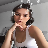

[(255, id    415c0c69-e8a9-4be9-bf0c-c3184447c84e
Name: 255, dtype: object), 1]
male


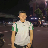

[(256, id    41949b7b-7f6d-475d-905e-2ad60d7ddcde
Name: 256, dtype: object), 1]
male


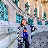

[(257, id    41a1c155-4842-4962-a304-b8d279235823
Name: 257, dtype: object), 0]
female


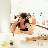

[(258, id    41ec5529-ba82-4237-ab92-7502e41cde7c
Name: 258, dtype: object), 1]
male


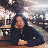

[(259, id    42249df3-5209-4db6-aa37-500c9a70b3bd
Name: 259, dtype: object), 1]
male


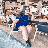

[(260, id    423dca17-dea4-4d77-8b95-29d3b7e9abfe
Name: 260, dtype: object), 1]
male


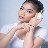

[(261, id    42a06c78-ebf9-4f66-80fa-38e97ecfac5b
Name: 261, dtype: object), 1]
male


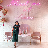

[(262, id    42e7fd45-4bc1-4512-8e23-14a427733e6d
Name: 262, dtype: object), 1]
male


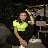

[(263, id    433e75f3-1389-4a89-bda7-1cd0195fd5b6
Name: 263, dtype: object), 1]
male


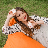

[(264, id    4351508f-1262-4ce3-8f3f-94b773191460
Name: 264, dtype: object), 1]
male


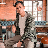

[(265, id    4425cec2-890b-4764-a742-7a88ccd20533
Name: 265, dtype: object), 1]
male


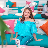

[(266, id    443aa79a-72f0-4ce1-b476-88b6addc0ebb
Name: 266, dtype: object), 1]
male


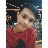

[(267, id    44846457-42a7-4a7c-9756-e31f8e750a2a
Name: 267, dtype: object), 1]
male


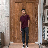

[(268, id    4615f036-409a-40c9-b4ee-c253c242f246
Name: 268, dtype: object), 1]
male


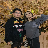

[(269, id    4669fe90-50e9-4ef6-8455-1d695a10eb29
Name: 269, dtype: object), 0]
female


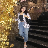

[(270, id    4682aee3-d2f1-40c5-ab5d-44440f7630b4
Name: 270, dtype: object), 0]
female


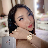

[(271, id    468bebe4-914a-4787-ae49-3ed0ef86c648
Name: 271, dtype: object), 1]
male


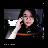

[(272, id    46c09eb8-388a-4734-bc06-ee0014faad8f
Name: 272, dtype: object), 1]
male


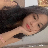

[(273, id    46d1a044-da5b-498b-b0b6-e1282e56735a
Name: 273, dtype: object), 1]
male


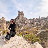

[(274, id    46e646e2-355d-449c-b51b-a2dab1338dee
Name: 274, dtype: object), 1]
male


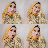

[(275, id    46ed5f73-1c80-4c65-8dd2-1e1aece00b58
Name: 275, dtype: object), 1]
male


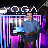

[(276, id    46efc24c-71b8-4782-905e-75a361f5c784
Name: 276, dtype: object), 1]
male


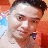

[(277, id    47216c23-7327-47c3-94d3-044b2f721df2
Name: 277, dtype: object), 1]
male


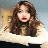

[(278, id    478796df-9672-44da-b9a7-76093fef5ba1
Name: 278, dtype: object), 1]
male


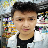

[(279, id    479d1c5d-b6f7-43e3-a53c-c0538cd105e5
Name: 279, dtype: object), 1]
male


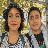

[(280, id    47b133f3-c42d-402b-9e35-0880f3628dd9
Name: 280, dtype: object), 1]
male


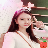

[(281, id    47b62045-a415-4ce7-b94d-b64f2796af4c
Name: 281, dtype: object), 1]
male


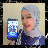

[(282, id    47bd681a-403b-4a36-aa77-a425975e050c
Name: 282, dtype: object), 0]
female


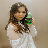

[(283, id    4806613b-7c0f-4d59-9da8-02bd82fb17e6
Name: 283, dtype: object), 0]
female


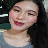

[(284, id    4833f4d3-0b55-42da-bac5-a7c6fa9668d4
Name: 284, dtype: object), 0]
female


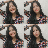

[(285, id    4870d63f-c2bb-4798-8e96-3bc9e6d0d8f4
Name: 285, dtype: object), 1]
male


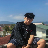

[(286, id    48f40888-edaa-4b25-90b5-b3cdd9fb9d3d
Name: 286, dtype: object), 1]
male


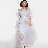

[(287, id    4917349f-26ef-434a-a23f-8a444443f49d
Name: 287, dtype: object), 1]
male


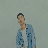

[(288, id    493dc86c-bcb1-4053-8b85-07fc89b2daa2
Name: 288, dtype: object), 1]
male


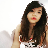

[(289, id    4952adc4-5843-4dce-8b64-352cfa40a538
Name: 289, dtype: object), 0]
female


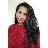

[(290, id    49a38274-579b-4371-8673-cd44141ae7be
Name: 290, dtype: object), 1]
male


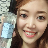

[(291, id    4a19fa83-6332-4819-bc50-1f566b14e8d6
Name: 291, dtype: object), 1]
male


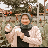

[(292, id    4a3a66c6-6760-42d9-8ddf-3489cb976ae4
Name: 292, dtype: object), 1]
male


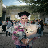

[(293, id    4ad3a37b-1f89-431c-bf74-80c81010154e
Name: 293, dtype: object), 1]
male


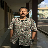

[(294, id    4ae9eba4-7f99-46b7-a672-cd327b675f2e
Name: 294, dtype: object), 1]
male


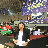

[(295, id    4aee83ae-813f-424f-8f3e-45fa8efdddb5
Name: 295, dtype: object), 1]
male


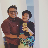

[(296, id    4b151091-4112-4679-abad-f8aa26150af4
Name: 296, dtype: object), 1]
male


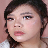

[(297, id    4b47a369-b58f-49f7-a9da-410c25f4f138
Name: 297, dtype: object), 1]
male


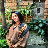

[(298, id    4b4c34ca-586d-4b8c-94c3-7c90de7c8c4e
Name: 298, dtype: object), 1]
male


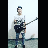

[(299, id    4b784829-fa30-4a40-ac56-23ae2e90c715
Name: 299, dtype: object), 0]
female


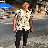

[(300, id    4bfe156e-a081-4088-a3f9-ea1f544854f6
Name: 300, dtype: object), 1]
male


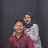

[(301, id    4c23953e-3653-44bd-bffd-95e3ccf8fc72
Name: 301, dtype: object), 1]
male


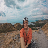

[(302, id    4c5b2fad-cc03-4dfd-9119-597f8d8a774b
Name: 302, dtype: object), 0]
female


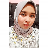

[(303, id    4ca05130-4ab5-4b28-8f4d-6e4ab248fdce
Name: 303, dtype: object), 1]
male


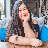

[(304, id    4cc50f1f-f7b8-4708-88ee-07b1b512a157
Name: 304, dtype: object), 0]
female


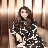

[(305, id    4d013f0d-1e52-4290-a662-ceb8e68ac75a
Name: 305, dtype: object), 1]
male


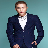

[(306, id    4d4533a3-adb7-495a-bfbe-d5d49a5abfaf
Name: 306, dtype: object), 1]
male


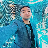

[(307, id    4d982410-b653-416a-915a-d4d5ddb6fceb
Name: 307, dtype: object), 1]
male


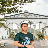

[(308, id    4da8e138-64f3-40eb-a364-c6991161fae7
Name: 308, dtype: object), 1]
male


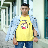

[(309, id    4db06b58-9338-4104-b1ad-e1734adec8e9
Name: 309, dtype: object), 1]
male


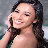

[(310, id    4dfee25e-423d-4051-b094-87fde89b9e65
Name: 310, dtype: object), 1]
male


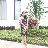

[(311, id    4e1a3eb9-939b-4d9e-af1d-3c1ef7f7a177
Name: 311, dtype: object), 0]
female


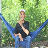

[(312, id    4e3faaf5-0a34-4add-ad62-b160c33480c4
Name: 312, dtype: object), 1]
male


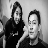

[(313, id    4e9d8f03-e2a1-47a2-bd77-30c36313129d
Name: 313, dtype: object), 0]
female


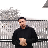

[(314, id    4ee9b0e7-688f-461f-92d3-57f550d06454
Name: 314, dtype: object), 1]
male


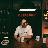

[(315, id    4f2cf8a5-20c6-4b72-9c54-f0f5011594a1
Name: 315, dtype: object), 1]
male


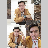

[(316, id    4f68072e-8a83-4af0-b855-3c4485141927
Name: 316, dtype: object), 1]
male


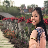

[(317, id    502f242b-f74d-431b-9ec0-92001584084e
Name: 317, dtype: object), 0]
female


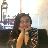

[(318, id    50372f40-5b61-46c2-a1da-cd7a89246256
Name: 318, dtype: object), 1]
male


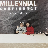

[(319, id    510c032d-aaed-4d9b-b492-ec703b526639
Name: 319, dtype: object), 1]
male


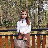

[(320, id    5194749a-c211-4b1b-bcd4-2ccd637f8fe6
Name: 320, dtype: object), 1]
male


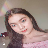

[(321, id    520441c1-1ae6-48c4-8a45-8c45bcafc1f4
Name: 321, dtype: object), 1]
male


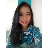

[(322, id    5207a5da-c314-475b-b75e-74f91302ae7a
Name: 322, dtype: object), 1]
male


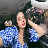

[(323, id    52c58347-cf53-4602-ac4d-d4d443a7cffa
Name: 323, dtype: object), 1]
male


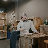

[(324, id    530ef95d-859f-4859-bce9-d6c8280bc732
Name: 324, dtype: object), 1]
male


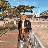

[(325, id    532a705c-45e5-4dea-bbee-9ec7539fc672
Name: 325, dtype: object), 1]
male


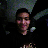

[(326, id    533f0cec-b17d-43b2-8884-4a0bc682ae08
Name: 326, dtype: object), 1]
male


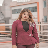

[(327, id    53975d72-a4b9-4734-9d19-ffa7b19e5986
Name: 327, dtype: object), 0]
female


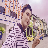

[(328, id    539e2018-fd66-466a-8fdf-cda29d00a9ce
Name: 328, dtype: object), 0]
female


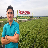

[(329, id    53fb3431-bdd5-4361-a996-a317e002a8a0
Name: 329, dtype: object), 0]
female


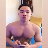

[(330, id    540109c9-60f8-415e-ac09-b10522cd4fb6
Name: 330, dtype: object), 1]
male


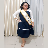

[(331, id    540e7988-159e-4df9-a546-7028c7cef557
Name: 331, dtype: object), 1]
male


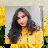

[(332, id    5533a176-bea5-41cb-bcc4-938b5a104597
Name: 332, dtype: object), 1]
male


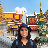

[(333, id    558a9266-dc5f-4330-b3ff-9ab788c4cce5
Name: 333, dtype: object), 1]
male


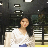

[(334, id    558d3170-f73d-43a2-ba5b-684e4945e96d
Name: 334, dtype: object), 1]
male


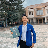

[(335, id    5600e32e-51c4-40eb-bbc5-bf2d27499578
Name: 335, dtype: object), 1]
male


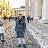

[(336, id    5704f9fc-32da-4473-86ec-9297bbee1676
Name: 336, dtype: object), 0]
female


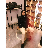

[(337, id    570a1aad-d286-4e7a-bc7f-ecb16575ca25
Name: 337, dtype: object), 0]
female


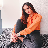

[(338, id    573fef8c-5fbe-4785-bc44-068a74e1ed40
Name: 338, dtype: object), 1]
male


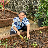

[(339, id    57920eb1-9200-45b6-b822-0a7f462d02ad
Name: 339, dtype: object), 1]
male


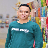

[(340, id    57aad33f-56d9-4e5e-b6cc-236bc71d26a7
Name: 340, dtype: object), 1]
male


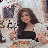

[(341, id    58301e8a-2e67-49c2-aad3-53cb3f615f92
Name: 341, dtype: object), 1]
male


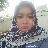

[(342, id    584abfbe-a06a-46a3-846c-c1aa88c5955f
Name: 342, dtype: object), 1]
male


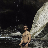

[(343, id    585a9776-0daa-4b85-b9be-1f2f662b2c05
Name: 343, dtype: object), 1]
male


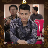

[(344, id    58f2ae3d-3ecb-4bfd-92ca-e3bb227f7ea3
Name: 344, dtype: object), 1]
male


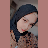

[(345, id    592cf898-e99c-4213-b29c-84b67c7e2685
Name: 345, dtype: object), 1]
male


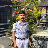

[(346, id    597d3b9a-dbba-4462-8c60-3b4732ec1540
Name: 346, dtype: object), 1]
male


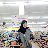

[(347, id    59b70fea-1e46-48b4-a751-156d7d2ff06c
Name: 347, dtype: object), 1]
male


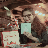

[(348, id    59c0bd77-4dde-401a-b432-2cd3dc6bde3d
Name: 348, dtype: object), 1]
male


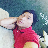

[(349, id    59dda362-9928-4519-98a2-1bb11f439ec7
Name: 349, dtype: object), 1]
male


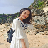

[(350, id    5a01f669-0d54-46f7-9965-f2f1f32d5bb8
Name: 350, dtype: object), 1]
male


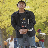

[(351, id    5a9e6451-03a2-4da7-8e4f-889e6319cabb
Name: 351, dtype: object), 1]
male


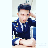

[(352, id    5ab919fb-6ab7-4420-8cd0-d07d9a8c227d
Name: 352, dtype: object), 1]
male


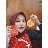

[(353, id    5b739a37-1d15-4a8e-9fc6-7c58d9adb4ee
Name: 353, dtype: object), 1]
male


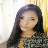

[(354, id    5bb6fa96-2f1f-46fe-9ae0-459739d20ad8
Name: 354, dtype: object), 0]
female


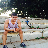

[(355, id    5bf5ff94-9034-4ae7-aded-c36c1ba6aaf1
Name: 355, dtype: object), 1]
male


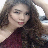

[(356, id    5c5f891f-71b4-489b-9efd-541be837c5c9
Name: 356, dtype: object), 1]
male


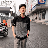

[(357, id    5cd5bfbb-4f18-4235-8ec1-8236477cdc47
Name: 357, dtype: object), 0]
female


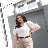

[(358, id    5cdef406-ad39-44f0-8359-cb5da86d37d1
Name: 358, dtype: object), 1]
male


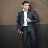

[(359, id    5cfab750-a2fe-4ade-83cb-1b8810dacaf4
Name: 359, dtype: object), 0]
female


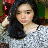

[(360, id    5d72437c-707f-4cbd-b055-f39a2b05aa22
Name: 360, dtype: object), 0]
female


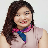

[(361, id    5d8623b4-1fff-40cd-89cd-f0f31e02b68d
Name: 361, dtype: object), 0]
female


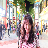

[(362, id    5df80d51-ae33-4cc2-8427-11ea864b687b
Name: 362, dtype: object), 1]
male


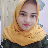

[(363, id    5dfca41c-2f2e-4ba6-a27d-f8c74c36d670
Name: 363, dtype: object), 1]
male


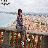

[(364, id    5e0617b0-ac52-4bc1-b539-0b8aedc74b49
Name: 364, dtype: object), 1]
male


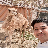

[(365, id    5e2e3f87-ce6f-4fbe-a6c9-c058796858dc
Name: 365, dtype: object), 1]
male


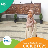

[(366, id    5e55bc6c-9525-410a-b25b-4b06d1535d2d
Name: 366, dtype: object), 1]
male


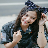

[(367, id    5ef20232-633c-4a28-bc74-4309e292d0c9
Name: 367, dtype: object), 1]
male


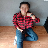

[(368, id    5f012efb-6804-4294-86b0-82e8dfa3513f
Name: 368, dtype: object), 1]
male


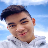

[(369, id    5f7e5457-ba40-4db2-ba22-5d98f111a0ee
Name: 369, dtype: object), 0]
female


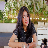

[(370, id    5fccee20-6a3b-4685-b568-d64102927b06
Name: 370, dtype: object), 1]
male


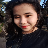

[(371, id    6026bede-f755-4388-b3bf-d55f68e01d68
Name: 371, dtype: object), 0]
female


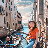

[(372, id    6090cd69-f2ea-4130-9fa6-9cfb9408f773
Name: 372, dtype: object), 1]
male


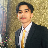

[(373, id    60b536db-9197-46c8-91b0-ee3b6e9acb75
Name: 373, dtype: object), 1]
male


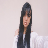

[(374, id    60bcce88-71bc-43bd-ac62-7e0ca80eab30
Name: 374, dtype: object), 1]
male


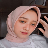

[(375, id    60ca3d5c-a660-4b00-ad02-0e94fc423654
Name: 375, dtype: object), 1]
male


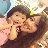

[(376, id    60ed9af0-1467-48d8-9dcc-e4781062f9bf
Name: 376, dtype: object), 1]
male


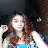

[(377, id    6113c116-3d47-4aae-9591-946f27ea96f6
Name: 377, dtype: object), 1]
male


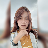

[(378, id    6121bc06-ccf0-4726-bfc2-4501af2a72d9
Name: 378, dtype: object), 0]
female


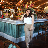

[(379, id    612f96da-0cb5-4b01-b888-e371fdb9d510
Name: 379, dtype: object), 0]
female


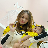

[(380, id    6152c4e2-2612-44d9-8928-80872a614667
Name: 380, dtype: object), 1]
male


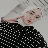

[(381, id    61ab6bdf-56e8-4415-add3-a6ccc914b60c
Name: 381, dtype: object), 1]
male


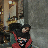

[(382, id    61bdbf08-ccd6-4ab9-9fee-949d432f3070
Name: 382, dtype: object), 1]
male


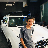

[(383, id    62638044-44f2-4bef-a04b-eca1356190d3
Name: 383, dtype: object), 1]
male


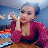

[(384, id    62add518-091f-49f3-a245-ce57666e7d28
Name: 384, dtype: object), 1]
male


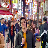

[(385, id    62fe4445-9935-45c7-a3f6-4aaf01ff929d
Name: 385, dtype: object), 1]
male


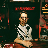

[(386, id    63069b52-6963-40a8-8031-ca9c0ea4efe3
Name: 386, dtype: object), 1]
male


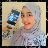

[(387, id    637d1b0c-b59f-4a69-8c02-34cac1721f28
Name: 387, dtype: object), 1]
male


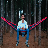

[(388, id    640b26b2-6aa4-4dc3-a61c-1afa37b25835
Name: 388, dtype: object), 0]
female


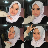

[(389, id    64703450-4b17-4f33-b39c-d5cce7733b85
Name: 389, dtype: object), 1]
male


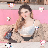

[(390, id    64769d82-303e-48d8-8ce2-f54c74e58150
Name: 390, dtype: object), 1]
male


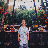

[(391, id    64774422-aea6-4b18-b632-1e925c3af159
Name: 391, dtype: object), 1]
male


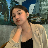

[(392, id    648597a3-ff42-4057-9410-8ef4abe0fc72
Name: 392, dtype: object), 1]
male


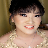

[(393, id    64aed8fe-383d-4498-b5ea-f10974d57eb5
Name: 393, dtype: object), 1]
male


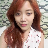

[(394, id    64b9dab5-d2ea-4bcf-bd9d-9050a8a6b924
Name: 394, dtype: object), 1]
male


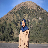

[(395, id    64cec35f-cf46-4a1d-88d0-e78d57324c72
Name: 395, dtype: object), 0]
female


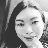

[(396, id    64de4ce7-e9d0-4c3e-bf2b-c44d38e5d27e
Name: 396, dtype: object), 0]
female


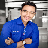

[(397, id    65449189-e8c6-4871-9e82-1839c9525a12
Name: 397, dtype: object), 1]
male


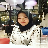

[(398, id    65be0eb0-b98e-4f11-b753-72deedb5c9e3
Name: 398, dtype: object), 1]
male


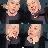

[(399, id    65e6d400-292e-42f7-b301-bbdef8eef3fb
Name: 399, dtype: object), 1]
male


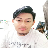

[(400, id    6608c04e-195f-41a6-a65a-5633412d94ad
Name: 400, dtype: object), 0]
female


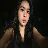

[(401, id    6624d480-cc3e-432f-a406-4dabdef06cd2
Name: 401, dtype: object), 1]
male


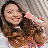

[(402, id    6645a474-4456-4321-8a2b-4dee3d070d0e
Name: 402, dtype: object), 0]
female


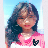

[(403, id    6653b548-9251-4d05-ad46-25fe79dd91d7
Name: 403, dtype: object), 0]
female


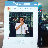

[(404, id    66bbc4c5-3840-41b5-819f-980eed1d1c3f
Name: 404, dtype: object), 1]
male


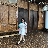

[(405, id    66c29ff1-2eca-48b9-8aee-a3222425d558
Name: 405, dtype: object), 1]
male


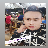

[(406, id    66d21f8b-cef5-48ba-b430-4f8bb05ded69
Name: 406, dtype: object), 1]
male


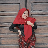

[(407, id    6762e395-9150-4f23-85ff-332fafbf1834
Name: 407, dtype: object), 0]
female


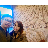

[(408, id    67b2ae3d-5adf-455f-9e4f-40d8deaeabe6
Name: 408, dtype: object), 1]
male


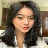

[(409, id    67d07ce5-b49e-4af5-8606-8e2bbfdb1522
Name: 409, dtype: object), 1]
male


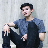

[(410, id    68593f42-5683-466c-9ec5-ddf4c59224f4
Name: 410, dtype: object), 1]
male


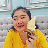

[(411, id    688e6227-a90e-4efa-9b54-fcca6b58808a
Name: 411, dtype: object), 1]
male


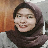

[(412, id    68e95dde-f6bf-4d1d-aa94-9107e1b9977a
Name: 412, dtype: object), 0]
female


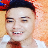

[(413, id    692962b6-2485-4d4e-ae61-c3670518acff
Name: 413, dtype: object), 1]
male


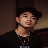

[(414, id    69bf7de9-636c-45d6-9cba-5fb989e1aed7
Name: 414, dtype: object), 1]
male


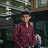

[(415, id    69c1a9b9-ab67-4152-8632-dd64b4196787
Name: 415, dtype: object), 1]
male


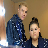

[(416, id    69f08b34-7e67-4a6d-9274-3fc84d222826
Name: 416, dtype: object), 1]
male


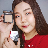

[(417, id    6a6a0275-035c-40d6-9d63-f82988b0fd7e
Name: 417, dtype: object), 1]
male


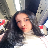

[(418, id    6abcad10-3ef2-4f9b-8e1b-3f86ce72c13a
Name: 418, dtype: object), 1]
male


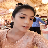

[(419, id    6b06af3a-ca78-45fd-8ca6-e8c94580fe4e
Name: 419, dtype: object), 1]
male


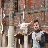

[(420, id    6b796db6-6a1d-4346-993b-956a5212adce
Name: 420, dtype: object), 1]
male


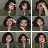

[(421, id    6b8f28ba-930a-404b-86c0-7510b323c788
Name: 421, dtype: object), 1]
male


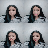

[(422, id    6be0175c-6ae3-4510-9684-fc3cae6aebb1
Name: 422, dtype: object), 0]
female


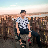

[(423, id    6be61b8b-389d-4796-97d5-82b295c34b6d
Name: 423, dtype: object), 1]
male


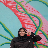

[(424, id    6be64575-b5d9-4df7-85dd-37ee16142c4b
Name: 424, dtype: object), 0]
female


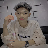

[(425, id    6cc89d5c-2ff3-428e-9cb5-988dea938cb0
Name: 425, dtype: object), 1]
male


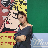

[(426, id    6cf1d499-b36d-4ba1-b169-d4f95995ca36
Name: 426, dtype: object), 1]
male


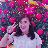

[(427, id    6d318df7-9c07-45bf-9396-71f78185decf
Name: 427, dtype: object), 1]
male


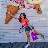

[(428, id    6d724156-9dc8-449c-85e9-30c0a9d18802
Name: 428, dtype: object), 1]
male


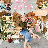

[(429, id    6e04e78a-c96e-48e8-b9be-9598f1161c81
Name: 429, dtype: object), 1]
male


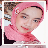

[(430, id    6e25ade0-d831-4fa8-a3f6-1eacaa3a01b6
Name: 430, dtype: object), 1]
male


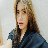

[(431, id    6e4869e2-e11d-41dc-a12f-e00867c5a85d
Name: 431, dtype: object), 1]
male


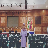

[(432, id    6e5503e2-c6f6-4a48-ac02-718a54284868
Name: 432, dtype: object), 1]
male


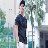

[(433, id    6e754934-df57-46f2-a357-64246f9312f4
Name: 433, dtype: object), 1]
male


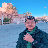

[(434, id    6e8df5f6-bbb4-449f-a13f-d38533a67201
Name: 434, dtype: object), 1]
male


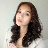

[(435, id    6ec8e486-cb58-46cf-a0ee-04d81c629525
Name: 435, dtype: object), 0]
female


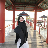

[(436, id    6ed6cee3-b46d-4336-8c76-9c83f1a4f158
Name: 436, dtype: object), 0]
female


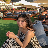

[(437, id    6f1f16f5-f0cf-48ef-9d95-5144c04c5399
Name: 437, dtype: object), 1]
male


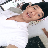

[(438, id    6f4fab5d-74bf-4829-aba9-d0c4952e9c03
Name: 438, dtype: object), 1]
male


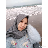

[(439, id    6f6f6e04-ebc8-4a58-8076-4543ef8021e5
Name: 439, dtype: object), 0]
female


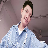

[(440, id    6fd2f36c-0aa4-4087-bc0e-cd0cbaecaeeb
Name: 440, dtype: object), 1]
male


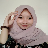

[(441, id    6fdb08c4-edea-4898-98d4-19c0a94842f4
Name: 441, dtype: object), 1]
male


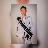

[(442, id    6fec1b23-fe84-4a92-9ba1-048a2b0f1e8c
Name: 442, dtype: object), 1]
male


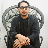

[(443, id    6ffd930d-25e3-4680-b4ed-4398ee445c90
Name: 443, dtype: object), 1]
male


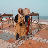

[(444, id    7011dca1-d54e-4870-bad4-9be4f9e8c32e
Name: 444, dtype: object), 1]
male


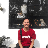

[(445, id    708aff87-3cd8-4950-afac-e136835a72fe
Name: 445, dtype: object), 1]
male


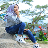

[(446, id    708e2f49-4654-4db8-afd7-65aad1e12ab3
Name: 446, dtype: object), 1]
male


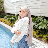

[(447, id    70d8fc34-5f23-4644-92c8-1111369ec42b
Name: 447, dtype: object), 1]
male


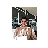

[(448, id    70e11053-4563-447f-bb5e-342b7fa6214d
Name: 448, dtype: object), 1]
male


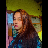

[(449, id    710d42ea-6b97-4b53-9f4a-f638b7009888
Name: 449, dtype: object), 1]
male


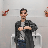

[(450, id    71499d9f-3f67-459d-8b24-c6014636ad19
Name: 450, dtype: object), 1]
male


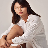

[(451, id    71d54a41-6d05-4f2b-982a-1a6e95130ad8
Name: 451, dtype: object), 0]
female


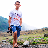

[(452, id    71e2cd8d-a1a3-4ef2-8fc6-fc7afa0e2f02
Name: 452, dtype: object), 1]
male


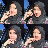

[(453, id    72052c53-13ae-4013-89e2-e79fb00fc778
Name: 453, dtype: object), 0]
female


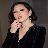

[(454, id    726d24e5-ba6c-4be6-b950-b521bbc8e1a4
Name: 454, dtype: object), 0]
female


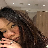

[(455, id    72777627-d24c-4ec4-ab57-7c89f43efda7
Name: 455, dtype: object), 1]
male


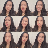

[(456, id    72a34181-8471-4414-a46d-8b6541514819
Name: 456, dtype: object), 1]
male


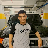

[(457, id    731e212d-5a32-46bb-8071-674bd777afbb
Name: 457, dtype: object), 1]
male


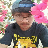

[(458, id    7354f32c-010f-43eb-9f08-f9f47d7918ce
Name: 458, dtype: object), 1]
male


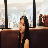

[(459, id    73746c69-e09c-4b55-a2b0-bfe2e806d7dc
Name: 459, dtype: object), 0]
female


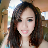

[(460, id    73d9b8a0-61fe-4c66-870c-2e672ea10428
Name: 460, dtype: object), 1]
male


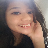

[(461, id    7420270c-067d-4218-96fc-5ebe5b90c78d
Name: 461, dtype: object), 0]
female


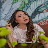

[(462, id    742422c7-8a97-4a1c-91fc-74348ea15917
Name: 462, dtype: object), 1]
male


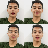

[(463, id    74387cae-182e-4a4a-b7a8-25fcb7b23a0a
Name: 463, dtype: object), 1]
male


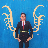

[(464, id    745b5f08-3aea-4ca1-a2b2-c2427e5686ea
Name: 464, dtype: object), 0]
female


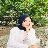

[(465, id    74782152-65d4-4436-8f81-f8d983c976c7
Name: 465, dtype: object), 1]
male


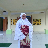

[(466, id    749e2261-3853-4f05-abac-564d76e206dc
Name: 466, dtype: object), 1]
male


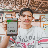

[(467, id    75610531-8ec2-4b68-acfa-62a1ba51d36a
Name: 467, dtype: object), 1]
male


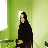

[(468, id    75cf9f24-7e84-4f8e-af00-8c8eef6c8c9d
Name: 468, dtype: object), 0]
female


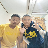

[(469, id    76000a31-31fc-4e06-bd0f-4611eb4c07d7
Name: 469, dtype: object), 1]
male


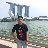

[(470, id    761b27c5-4b24-430c-ab39-07790b96a70c
Name: 470, dtype: object), 1]
male


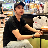

[(471, id    76802e45-a227-4d0d-bd1c-7f34375e4d42
Name: 471, dtype: object), 1]
male


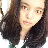

[(472, id    76972586-5d40-410e-8d9d-2c1fdd1bb7e8
Name: 472, dtype: object), 1]
male


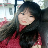

[(473, id    76bdaed7-eeb1-41ff-a9f0-8f2bc3d8cf0a
Name: 473, dtype: object), 1]
male


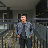

[(474, id    76ce1091-40b4-43b8-a25a-ee79e6537b9a
Name: 474, dtype: object), 1]
male


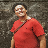

[(475, id    76d0f659-df27-4d51-9be2-b5f7092e6858
Name: 475, dtype: object), 1]
male


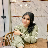

[(476, id    771dfeb2-a5e8-400b-8813-23899170f4e9
Name: 476, dtype: object), 1]
male


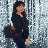

[(477, id    77412378-59b2-48c5-b945-cf6f22256701
Name: 477, dtype: object), 0]
female


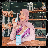

[(478, id    775ada75-c58d-427b-b5d9-251f42e65e41
Name: 478, dtype: object), 1]
male


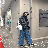

[(479, id    77ab3be6-fe92-4479-9004-2a553dad8a75
Name: 479, dtype: object), 0]
female


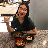

[(480, id    78a6d874-d074-4ed9-9246-4077bd5cc4f4
Name: 480, dtype: object), 1]
male


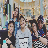

[(481, id    78d13665-39c8-4e8d-99f5-347268dbc01c
Name: 481, dtype: object), 1]
male


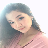

[(482, id    79b0d74c-a0fc-4a89-855d-9bc036b93d67
Name: 482, dtype: object), 1]
male


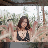

[(483, id    79ba03d6-0c66-45c0-a89b-87d909ac3d3d
Name: 483, dtype: object), 1]
male


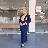

[(484, id    79c696c5-ecad-4107-acbe-7e79df1c3124
Name: 484, dtype: object), 1]
male


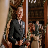

[(485, id    7a4a66af-c98c-43fb-a040-f376293466bf
Name: 485, dtype: object), 0]
female


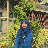

[(486, id    7a506742-bb64-4d1c-aff0-86d16988d664
Name: 486, dtype: object), 1]
male


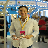

[(487, id    7a6ef0fe-2bc5-4c04-93a5-cb2bebf0e3dd
Name: 487, dtype: object), 0]
female


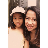

[(488, id    7ae2968d-4a18-45b3-8524-69609cad8813
Name: 488, dtype: object), 1]
male


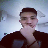

[(489, id    7b606042-3243-43ea-8b78-d6fe53b2959c
Name: 489, dtype: object), 1]
male


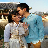

[(490, id    7bb8886a-2cab-4a3c-bd3d-f1e1a259ae17
Name: 490, dtype: object), 1]
male


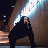

[(491, id    7be085b4-8555-4025-9b0e-2e53142b47f4
Name: 491, dtype: object), 0]
female


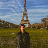

[(492, id    7bf86b14-68ce-4c7d-ba4e-c292ba861f67
Name: 492, dtype: object), 1]
male


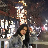

[(493, id    7c98a559-ffdb-4835-ba2c-f73b7b6ac6bd
Name: 493, dtype: object), 1]
male


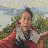

[(494, id    7d11a42f-8684-4efd-95d9-67ab70f5f6e2
Name: 494, dtype: object), 1]
male


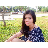

[(495, id    7d184ae8-adc1-409d-a295-c1b31f9311a1
Name: 495, dtype: object), 0]
female


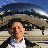

[(496, id    7d2752d1-9e8e-4019-850e-57fc9319a9ae
Name: 496, dtype: object), 1]
male


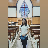

[(497, id    7d69f2a8-0170-417e-aa87-29a84d4ff0de
Name: 497, dtype: object), 1]
male


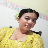

[(498, id    7d712780-9526-4dc5-af51-d97565c9d48d
Name: 498, dtype: object), 0]
female


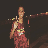

[(499, id    7dab2088-e088-49c4-8da5-94a606603ae6
Name: 499, dtype: object), 1]
male


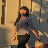

[(500, id    7e382128-34fc-469c-9164-0f9110fa0fab
Name: 500, dtype: object), 1]
male


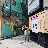

[(501, id    7e4e4c42-bab1-44f3-aeae-243e26dd17a0
Name: 501, dtype: object), 1]
male


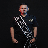

[(502, id    7e504e96-83a4-48fe-b52b-7b7801dee896
Name: 502, dtype: object), 1]
male


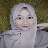

[(503, id    7efafc0f-044e-432b-bd38-7b9b7e86df0c
Name: 503, dtype: object), 0]
female


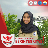

[(504, id    7f06a0ed-1293-4d8a-ad05-b571e9045c0e
Name: 504, dtype: object), 1]
male


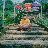

[(505, id    7f0b66a5-bbea-4318-9339-ad5f63c6ad03
Name: 505, dtype: object), 1]
male


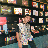

[(506, id    7f4284c8-0cd5-407d-8942-474e2c97a293
Name: 506, dtype: object), 0]
female


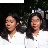

[(507, id    7f939829-0b60-47ab-8e75-34772f11c287
Name: 507, dtype: object), 1]
male


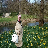

[(508, id    7fdd7c7a-8ed9-484e-a906-8f8f11bccfc0
Name: 508, dtype: object), 1]
male


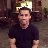

[(509, id    80060022-0cca-4d2c-a49c-494c2a4570be
Name: 509, dtype: object), 1]
male


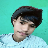

[(510, id    80652a3a-b3b8-4e2e-a46d-7fa933fb4a6f
Name: 510, dtype: object), 1]
male


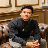

[(511, id    807100cd-de90-4a78-8885-d18f4203f6ad
Name: 511, dtype: object), 0]
female


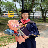

[(512, id    808082dc-2780-475f-ab60-10ba9b324549
Name: 512, dtype: object), 1]
male


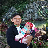

[(513, id    80b63b07-687e-476e-8246-e33e2845c074
Name: 513, dtype: object), 1]
male


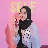

[(514, id    80dcd033-89b8-4675-8f49-38ee8cd54226
Name: 514, dtype: object), 1]
male


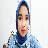

[(515, id    80f5ca63-038b-4825-9e2a-5817ff23a464
Name: 515, dtype: object), 0]
female


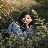

[(516, id    814ee3aa-d360-431f-b996-482c856da8e2
Name: 516, dtype: object), 1]
male


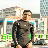

[(517, id    81b753a8-fb94-4f17-b9c6-50a79311fd87
Name: 517, dtype: object), 1]
male


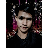

[(518, id    81c03527-4e8b-4ed0-8ebd-29576c249a1f
Name: 518, dtype: object), 1]
male


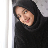

[(519, id    81f3edfe-acf0-4561-b887-e06abba8c88d
Name: 519, dtype: object), 0]
female


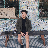

[(520, id    820bdb63-2758-43ca-a6c4-3f775f814fcc
Name: 520, dtype: object), 0]
female


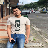

[(521, id    825c6768-4695-43b4-983c-708549f0a341
Name: 521, dtype: object), 1]
male


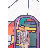

[(522, id    82779fc7-d50f-42cf-9416-3bd49070307e
Name: 522, dtype: object), 1]
male


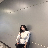

[(523, id    8295b792-d32d-4330-abe2-2d4e43019e3c
Name: 523, dtype: object), 0]
female


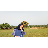

[(524, id    82c571e1-a161-479d-89df-31217f63dfe9
Name: 524, dtype: object), 1]
male


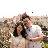

[(525, id    834b2c08-5090-4788-b61f-cbd89ae12ffe
Name: 525, dtype: object), 1]
male


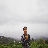

[(526, id    838c8f77-eef3-409e-bd97-00597f952a8f
Name: 526, dtype: object), 0]
female


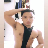

[(527, id    83edf605-1bb2-43f5-8559-351cc5760d86
Name: 527, dtype: object), 1]
male


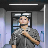

[(528, id    8416e90f-1146-41e5-86fe-631a7acb8193
Name: 528, dtype: object), 0]
female


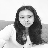

[(529, id    8481629f-ffdf-4273-9bb7-b894af762281
Name: 529, dtype: object), 0]
female


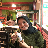

[(530, id    848e7dca-ff0b-4c79-8c5e-32d300b89525
Name: 530, dtype: object), 1]
male


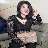

[(531, id    84ae18f7-5685-4b9e-a04a-36c9ffdd4a63
Name: 531, dtype: object), 1]
male


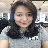

[(532, id    8508da8f-a627-478e-bd2c-67b577719632
Name: 532, dtype: object), 1]
male


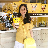

[(533, id    85420b6f-1190-4fd3-9e68-69263f005a17
Name: 533, dtype: object), 0]
female


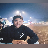

[(534, id    85430fe2-746a-43d4-b54c-1615ed8d0b3e
Name: 534, dtype: object), 0]
female


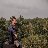

[(535, id    854fab52-3d70-4031-b473-190e650d0f4a
Name: 535, dtype: object), 1]
male


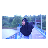

[(536, id    8598d775-9463-4f27-b54a-15ebe33d17df
Name: 536, dtype: object), 1]
male


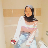

[(537, id    867c7c01-6b46-4f28-97b8-4724a6a9b7f6
Name: 537, dtype: object), 0]
female


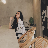

[(538, id    86a0d0f5-4c34-4fa1-8fae-23678557765b
Name: 538, dtype: object), 1]
male


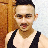

[(539, id    86a91bd1-8761-4a5c-afcd-1d7332dd426e
Name: 539, dtype: object), 1]
male


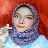

[(540, id    86fb0065-4601-451c-98d6-b5ae6a9b6762
Name: 540, dtype: object), 0]
female


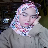

[(541, id    888e7a3e-8ac7-4ab9-8905-509abe91b017
Name: 541, dtype: object), 0]
female


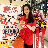

[(542, id    88ce23e3-d5d3-4013-9688-b61aa50610c5
Name: 542, dtype: object), 1]
male


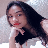

[(543, id    88e37c62-2c85-4b6e-8db8-2dc916b7493d
Name: 543, dtype: object), 1]
male


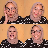

[(544, id    89279dbc-c826-4888-993c-e9f2816b03f8
Name: 544, dtype: object), 1]
male


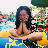

[(545, id    89691a85-4b65-4e2d-a592-2deaf9616d9f
Name: 545, dtype: object), 1]
male


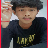

[(546, id    89c15fbc-4599-4d9d-85ee-d738972cead8
Name: 546, dtype: object), 1]
male


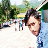

[(547, id    89d8ccaf-2571-4513-a3e9-b29949ba93db
Name: 547, dtype: object), 1]
male


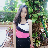

[(548, id    89e0e21b-265c-48b1-ac38-576d831ed939
Name: 548, dtype: object), 1]
male


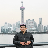

[(549, id    8a09e175-1684-409d-a175-50eba6320d70
Name: 549, dtype: object), 1]
male


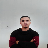

[(550, id    8a2c75b8-545b-4d8e-9f1c-4d5394918b27
Name: 550, dtype: object), 1]
male


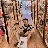

[(551, id    8a4f953a-1099-460f-b59a-c239cd53813d
Name: 551, dtype: object), 0]
female


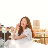

[(552, id    8a64072c-0c0b-4dff-a16f-a269984d01a2
Name: 552, dtype: object), 1]
male


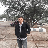

[(553, id    8ad7b43f-4c11-4730-a8e8-94ee781f0a21
Name: 553, dtype: object), 1]
male


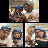

[(554, id    8b98460a-d509-4d99-a563-0ad9e673eef9
Name: 554, dtype: object), 1]
male


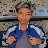

[(555, id    8baa429c-e4b0-408a-a454-a28e3a5cb5af
Name: 555, dtype: object), 1]
male


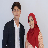

[(556, id    8bc43b5a-15c8-4027-ac86-5bca42125bb4
Name: 556, dtype: object), 1]
male


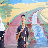

[(557, id    8c4fb1d8-06c1-4233-be3d-0640308b6a5f
Name: 557, dtype: object), 0]
female


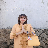

[(558, id    8c8f0985-7f1a-41e5-9679-ced741105799
Name: 558, dtype: object), 0]
female


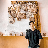

[(559, id    8d2cbe67-7861-4ad0-8445-b5a209cd90d0
Name: 559, dtype: object), 0]
female


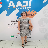

[(560, id    8d8ab27a-4493-4796-8651-5acbd974625c
Name: 560, dtype: object), 1]
male


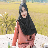

[(561, id    8dce0504-6fdf-4243-ac0d-a2b4da9e20ab
Name: 561, dtype: object), 1]
male


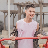

[(562, id    8dee71a6-8fa5-429a-a9f7-0e715751ad7e
Name: 562, dtype: object), 1]
male


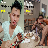

[(563, id    8df72db6-3784-49f7-a10d-36cfd7d83932
Name: 563, dtype: object), 1]
male


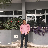

[(564, id    8e19359f-aca7-412f-a89b-488323474ffb
Name: 564, dtype: object), 0]
female


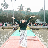

[(565, id    8e6a8ba3-52c3-40a5-8408-e5ac8ad936e0
Name: 565, dtype: object), 1]
male


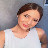

[(566, id    8e9b2f36-9651-45a9-b62c-71efb2fbe6e7
Name: 566, dtype: object), 1]
male


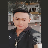

[(567, id    8ecb3f68-73d2-42b7-af52-357c4ed4a852
Name: 567, dtype: object), 1]
male


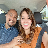

[(568, id    8f1d6f8e-4633-4b74-97fa-273b14223243
Name: 568, dtype: object), 0]
female


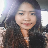

[(569, id    8f4c8503-1359-4581-a52d-51373a823997
Name: 569, dtype: object), 1]
male


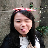

[(570, id    8f7f84f0-6435-45f1-beb0-9c0f1bca4393
Name: 570, dtype: object), 0]
female


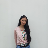

[(571, id    8fc1ebd4-4ee5-4f02-bfd1-40efa51709b3
Name: 571, dtype: object), 0]
female


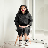

[(572, id    8feb72a3-146c-4d9c-a9f8-f1531c41c8b6
Name: 572, dtype: object), 0]
female


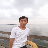

[(573, id    8ff35923-e22f-4663-9e3f-032a918d97e5
Name: 573, dtype: object), 0]
female


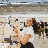

[(574, id    8ff939fa-9065-478f-8792-0e7814848f8e
Name: 574, dtype: object), 1]
male


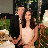

[(575, id    9077f97c-a553-467a-8f1d-0e86ec9456af
Name: 575, dtype: object), 1]
male


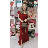

[(576, id    90808655-4f0a-4ea6-92ca-22ed26dda7a5
Name: 576, dtype: object), 0]
female


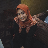

[(577, id    90855b78-b285-465a-b79f-7cb8448c2e0d
Name: 577, dtype: object), 0]
female


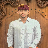

[(578, id    908ab3fa-d288-4464-a446-a51a29136be6
Name: 578, dtype: object), 1]
male


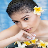

[(579, id    90e2f691-1cfa-4559-b684-dadfbe46bde4
Name: 579, dtype: object), 1]
male


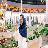

[(580, id    9157f710-ed42-4792-ac1c-ce24d9883f5a
Name: 580, dtype: object), 1]
male


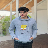

[(581, id    9187f624-f546-40c0-a562-4ad0cd352fab
Name: 581, dtype: object), 1]
male


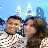

[(582, id    91c06a35-1960-46d3-be71-ebcea865bf7b
Name: 582, dtype: object), 1]
male


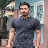

[(583, id    91fbc4f2-092a-4f13-8d28-3e388d14082e
Name: 583, dtype: object), 1]
male


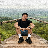

[(584, id    9340d218-5712-4cd8-94ce-216f67861ef7
Name: 584, dtype: object), 1]
male


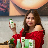

[(585, id    936a0679-af82-44cd-91e3-106d738c16d9
Name: 585, dtype: object), 1]
male


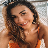

[(586, id    939c6cae-9a8a-4d2f-9096-e167ab3d5248
Name: 586, dtype: object), 1]
male


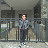

[(587, id    93e91152-c982-43d1-8b53-45d890537a30
Name: 587, dtype: object), 1]
male


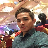

[(588, id    93f98f12-006e-4eb3-9eb8-274934d837c1
Name: 588, dtype: object), 1]
male


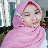

[(589, id    940b1074-de37-401f-af38-e30af7031db4
Name: 589, dtype: object), 0]
female


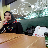

[(590, id    941d233c-c24c-4f04-b3a4-ac1915aca7bb
Name: 590, dtype: object), 1]
male


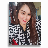

[(591, id    94214c41-713d-41f7-9210-8ccd36415bfa
Name: 591, dtype: object), 1]
male


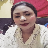

[(592, id    944a626b-c310-4a32-b964-7bca67de1077
Name: 592, dtype: object), 0]
female


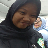

[(593, id    945f2996-f2b3-4464-860c-8e2c195c2371
Name: 593, dtype: object), 0]
female


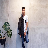

[(594, id    946c8d6b-b335-4d5c-95e3-270a9be8934a
Name: 594, dtype: object), 0]
female


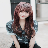

[(595, id    952b3127-8aad-4b2f-81a2-5dc1d87b73f2
Name: 595, dtype: object), 0]
female


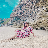

[(596, id    95feb8fd-a648-4b7f-a433-c1601353788f
Name: 596, dtype: object), 0]
female


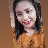

[(597, id    96112bd9-e3a4-48f0-a71f-36a7bee2ae0e
Name: 597, dtype: object), 0]
female


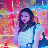

[(598, id    96748cff-09c8-4cdc-8765-b5736d61f51f
Name: 598, dtype: object), 0]
female


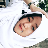

[(599, id    96a37659-348f-46bc-b632-96235a4ef2b5
Name: 599, dtype: object), 0]
female


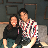

[(600, id    96d0f9e1-b210-49d2-a1e7-406d4f053363
Name: 600, dtype: object), 1]
male


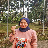

[(601, id    981ee90f-a0fd-4c56-80d3-1702cf262c6d
Name: 601, dtype: object), 1]
male


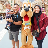

[(602, id    986b616d-f939-465e-a7cb-5e7318229068
Name: 602, dtype: object), 0]
female


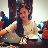

[(603, id    988b48e5-a02e-45b2-a991-7c88ee572106
Name: 603, dtype: object), 1]
male


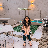

[(604, id    98998875-422c-4183-9fa7-933cc6c2507d
Name: 604, dtype: object), 0]
female


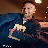

[(605, id    98c109ce-675b-4cf5-b9ca-bd0239f0c50e
Name: 605, dtype: object), 0]
female


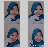

[(606, id    98f98d23-e070-4e59-b891-8a68296f41e4
Name: 606, dtype: object), 1]
male


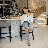

[(607, id    991dd5a6-2244-4234-af78-8614ae567163
Name: 607, dtype: object), 1]
male


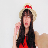

[(608, id    99cb17a9-eaa7-447b-b67f-5939d4fd36cc
Name: 608, dtype: object), 1]
male


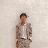

[(609, id    9a609f6a-01e5-4c90-a917-1b97c055b047
Name: 609, dtype: object), 0]
female


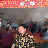

[(610, id    9ab33dfe-62da-4385-a2f0-088f72b037de
Name: 610, dtype: object), 1]
male


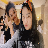

[(611, id    9af944d0-5eba-4e76-8e02-d18a5d47c8fb
Name: 611, dtype: object), 1]
male


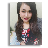

[(612, id    9b091416-4418-4ba7-af83-fdd74ad9f8a3
Name: 612, dtype: object), 0]
female


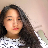

[(613, id    9b1ca070-defa-4871-9d4c-04dcb67677f0
Name: 613, dtype: object), 1]
male


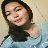

[(614, id    9b92aa70-0a4f-438a-a95b-fc005c652c49
Name: 614, dtype: object), 1]
male


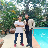

[(615, id    9b94a55d-e985-4c8a-9fb5-d7d79c68fc1c
Name: 615, dtype: object), 1]
male


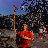

[(616, id    9ba99835-59f3-4ae1-b76b-8e705337daff
Name: 616, dtype: object), 1]
male


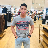

[(617, id    9bb6c29f-4bb0-4bc2-acb3-cc165dd7f144
Name: 617, dtype: object), 1]
male


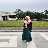

[(618, id    9bc3f968-d45c-4470-81d8-1f2873c49012
Name: 618, dtype: object), 1]
male


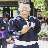

[(619, id    9c475ae8-64b7-4cea-b7b9-0331d6c04044
Name: 619, dtype: object), 1]
male


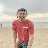

[(620, id    9c687b68-63e5-493c-b644-7e108765e3bc
Name: 620, dtype: object), 1]
male


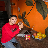

[(621, id    9d1eaddb-331e-4180-8940-12c3cf53a427
Name: 621, dtype: object), 1]
male


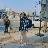

[(622, id    9d6558d5-e1a4-4f4b-93f2-fd78c27ea7ba
Name: 622, dtype: object), 1]
male


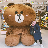

[(623, id    9d9c9194-a1b1-4c13-96c2-f326414d6251
Name: 623, dtype: object), 0]
female


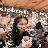

[(624, id    9dc00a8d-8c5d-4ab1-816e-d9de2de04321
Name: 624, dtype: object), 1]
male


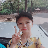

[(625, id    9de33557-5f3c-4809-8806-6f7a6a628904
Name: 625, dtype: object), 0]
female


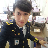

[(626, id    9e4ea075-3b9f-4ef2-b6ee-52659cb33b2b
Name: 626, dtype: object), 1]
male


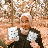

[(627, id    9e912a52-4f5a-4ace-a117-101fb9e7c6f6
Name: 627, dtype: object), 1]
male


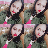

[(628, id    9e99f2cc-cb49-4fa6-aa54-8347dadcc93c
Name: 628, dtype: object), 1]
male


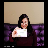

[(629, id    9ea3ea17-fb55-491c-9c46-98ae7449bad0
Name: 629, dtype: object), 1]
male


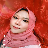

[(630, id    9ebd9858-9980-466a-b6cc-46d6dbc71ec3
Name: 630, dtype: object), 0]
female


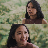

[(631, id    9ef36630-21b9-4dda-a19a-69d9ec393ad7
Name: 631, dtype: object), 0]
female


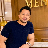

[(632, id    9fa74db8-917c-4b07-a876-b42798940f88
Name: 632, dtype: object), 0]
female


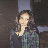

[(633, id    a00fb3fc-7fcc-426c-9471-1080d04525e2
Name: 633, dtype: object), 0]
female


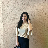

[(634, id    a054058b-488e-4ce6-8b02-db7e160a6685
Name: 634, dtype: object), 0]
female


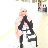

[(635, id    a0742f57-91fc-4129-8c36-e8db512bc98b
Name: 635, dtype: object), 1]
male


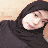

[(636, id    a08d073b-7719-49c0-ac61-d0c5d64e4bf9
Name: 636, dtype: object), 0]
female


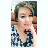

[(637, id    a093760a-7ae4-4fba-bd6c-321b0382f9bf
Name: 637, dtype: object), 0]
female


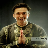

[(638, id    a0d249db-549a-419c-b466-26074845ce17
Name: 638, dtype: object), 0]
female


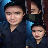

[(639, id    a1f1a0f3-fef7-4fc9-966f-ddf937e96873
Name: 639, dtype: object), 1]
male


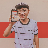

[(640, id    a20a69ba-4475-4ccd-8da8-01a977c9e397
Name: 640, dtype: object), 1]
male


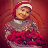

[(641, id    a3018ba3-ac1c-459d-95ac-f22ae5c828fa
Name: 641, dtype: object), 1]
male


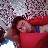

[(642, id    a349d851-1a1c-4cb4-a289-8e1c8e79283c
Name: 642, dtype: object), 1]
male


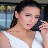

[(643, id    a3fb6515-3130-498b-9edf-48691bec54d7
Name: 643, dtype: object), 1]
male


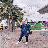

[(644, id    a44ac1c5-e191-42a0-8264-0e335eef37b9
Name: 644, dtype: object), 0]
female


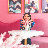

[(645, id    a5223212-21ae-4dde-85f1-c3a1397b2c3d
Name: 645, dtype: object), 1]
male


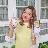

[(646, id    a5753c1a-5423-4e4d-8d73-702d290850f2
Name: 646, dtype: object), 0]
female


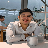

[(647, id    a59253d0-27c7-47d7-993f-d7ceefaad5e8
Name: 647, dtype: object), 0]
female


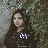

[(648, id    a6052ae0-6d48-4fb8-adff-342b6dc8a549
Name: 648, dtype: object), 0]
female


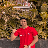

[(649, id    a61c9066-b373-43e4-9b87-b009b6ddb348
Name: 649, dtype: object), 1]
male


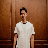

[(650, id    a64482f2-1dba-44ac-8272-22d038e4bfa0
Name: 650, dtype: object), 1]
male


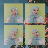

[(651, id    a6746656-a6f5-40b4-8dba-8d12a1270d11
Name: 651, dtype: object), 0]
female


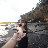

[(652, id    a67f40e9-92a3-4c2b-b649-aec58aea1917
Name: 652, dtype: object), 1]
male


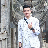

[(653, id    a6d5ee88-6979-488a-9b95-1b1d5eeb897c
Name: 653, dtype: object), 1]
male


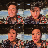

[(654, id    a6ef1e1b-3012-4910-88e1-c1a10df54bba
Name: 654, dtype: object), 1]
male


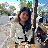

[(655, id    a75969b2-2d34-415e-9b9b-eb2c124f15ab
Name: 655, dtype: object), 1]
male


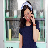

[(656, id    a75cfffb-6ee5-4eb9-bdba-4a31de9a8d1c
Name: 656, dtype: object), 0]
female


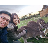

[(657, id    a7ec93c7-7a46-42d5-814a-5fce183e46b0
Name: 657, dtype: object), 0]
female


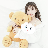

[(658, id    a845f9c0-f5ec-4fdf-a218-2287fe501387
Name: 658, dtype: object), 0]
female


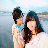

[(659, id    a8527d2c-f06a-4f2c-923a-6fd544cb956f
Name: 659, dtype: object), 0]
female


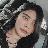

[(660, id    a87c8c4e-5520-450c-8b1c-73f9d2ae3bd1
Name: 660, dtype: object), 0]
female


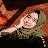

[(661, id    a87dec18-9943-4315-bd62-09ea03b390b6
Name: 661, dtype: object), 0]
female


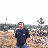

[(662, id    a8c6d8fa-13c6-4f83-a19c-32329112d2a2
Name: 662, dtype: object), 0]
female


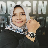

[(663, id    a8eec594-561c-49c6-bae1-6803b42d8415
Name: 663, dtype: object), 1]
male


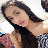

[(664, id    a95a8470-b05b-4889-8277-cd2f365ce9bf
Name: 664, dtype: object), 1]
male


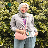

[(665, id    a978f9a2-69ec-4c89-9227-0bd0213a20db
Name: 665, dtype: object), 1]
male


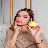

[(666, id    aa0f9557-5e40-49a4-9ebc-8c205344973e
Name: 666, dtype: object), 1]
male


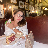

[(667, id    aa14e18c-8615-49c1-b8be-4033cd56f2a1
Name: 667, dtype: object), 0]
female


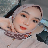

[(668, id    aa6747fc-2f7c-49ca-a910-fc48455deb81
Name: 668, dtype: object), 1]
male


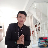

[(669, id    aaaf77fa-6739-4532-adcf-6aa7b7028f3a
Name: 669, dtype: object), 1]
male


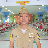

[(670, id    aab108ef-095c-410f-bb8c-f7edec27ff59
Name: 670, dtype: object), 1]
male


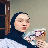

[(671, id    ab44b890-3c26-48f0-9a43-bb1ee95055ba
Name: 671, dtype: object), 1]
male


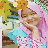

[(672, id    ab8f9354-88f0-46b6-9f4c-7f6856493113
Name: 672, dtype: object), 1]
male


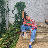

[(673, id    ab97a48b-ac2e-47f8-8be0-5f62537919d9
Name: 673, dtype: object), 1]
male


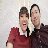

[(674, id    abc51f7b-3e17-48c8-8abe-2ea18e898948
Name: 674, dtype: object), 1]
male


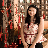

[(675, id    ac0399ef-410c-4cfe-a418-cc4cf4d45210
Name: 675, dtype: object), 1]
male


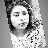

[(676, id    acb4eaeb-1bef-415a-b319-105ac7d3e019
Name: 676, dtype: object), 0]
female


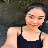

[(677, id    acb7236e-a2a7-4aea-a2ce-9cfcf44be844
Name: 677, dtype: object), 1]
male


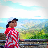

[(678, id    ad2766b4-a7b8-4fe4-9203-efa14af08ae8
Name: 678, dtype: object), 1]
male


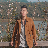

[(679, id    ad2c114b-aab0-4553-9f13-d43cac7c23e2
Name: 679, dtype: object), 0]
female


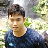

[(680, id    ad8a3195-ef9d-4ad7-b5de-44d72f257158
Name: 680, dtype: object), 0]
female


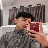

[(681, id    ada1c634-cc64-4f87-aa8a-0a8fed114d53
Name: 681, dtype: object), 1]
male


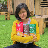

[(682, id    adbd8034-1983-4902-bdc2-f2a5748d574b
Name: 682, dtype: object), 1]
male


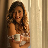

[(683, id    ade5943b-6648-40b5-b540-5f5eb347d838
Name: 683, dtype: object), 1]
male


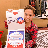

[(684, id    ae5e0b6b-aa0c-4a8a-a3cd-dd7c75740c0c
Name: 684, dtype: object), 1]
male


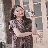

[(685, id    af20f248-9863-425c-92a0-1a3cc55073c7
Name: 685, dtype: object), 1]
male


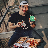

[(686, id    af284de8-5186-40c3-b306-162af0542987
Name: 686, dtype: object), 1]
male


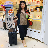

[(687, id    af4125e4-2869-4c4f-b0ed-0c622e818316
Name: 687, dtype: object), 1]
male


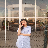

[(688, id    afb0428f-d2c6-4c83-ae46-c6ba4275a57d
Name: 688, dtype: object), 1]
male


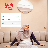

[(689, id    b05a973c-3c24-477a-a170-7861e5cd22c5
Name: 689, dtype: object), 1]
male


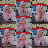

[(690, id    b1062c5b-8cad-4132-9196-f2cfffde3d39
Name: 690, dtype: object), 1]
male


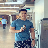

[(691, id    b10a637c-003b-496d-b553-3901a2effc91
Name: 691, dtype: object), 1]
male


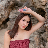

[(692, id    b15af025-be4c-4369-836d-5ce5dad6f678
Name: 692, dtype: object), 0]
female


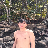

[(693, id    b1824770-af72-4ebc-9982-b31e0fef73ac
Name: 693, dtype: object), 1]
male


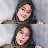

[(694, id    b197b38b-dc0f-4922-8941-6af3d1890d4a
Name: 694, dtype: object), 1]
male


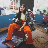

[(695, id    b1ce2e6f-747b-4034-a595-8905de787854
Name: 695, dtype: object), 1]
male


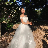

[(696, id    b232b7f7-0286-4a22-be9b-27ab724b67f1
Name: 696, dtype: object), 1]
male


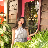

[(697, id    b2939052-a859-4478-92d6-ba0219d2a44f
Name: 697, dtype: object), 1]
male


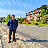

[(698, id    b33b57d7-3a63-4d26-9545-a49e071275ac
Name: 698, dtype: object), 1]
male


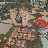

[(699, id    b34911c4-01c7-4634-886c-d69e72a5ea14
Name: 699, dtype: object), 0]
female


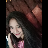

[(700, id    b34e3594-f6ae-4d6f-9b36-183c339c3f2b
Name: 700, dtype: object), 1]
male


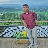

[(701, id    b395ae35-b173-43e6-b94b-7d537209dfaf
Name: 701, dtype: object), 0]
female


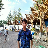

[(702, id    b3984555-b3b6-4f20-946c-91fe8582fb75
Name: 702, dtype: object), 1]
male


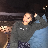

[(703, id    b3ca6a82-191e-48f6-a6e3-5487f69ff8d4
Name: 703, dtype: object), 1]
male


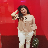

[(704, id    b3f76fb9-9567-43df-b529-1e02f674c4f9
Name: 704, dtype: object), 1]
male


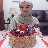

[(705, id    b4060312-6161-4c96-a438-627fab7c018e
Name: 705, dtype: object), 1]
male


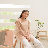

[(706, id    b421bb77-dcb1-4f1d-bbdf-e51f0bb41893
Name: 706, dtype: object), 0]
female


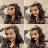

[(707, id    b43c92c9-185c-4182-b461-7c87de6d5471
Name: 707, dtype: object), 1]
male


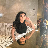

[(708, id    b4501e0c-fca4-4d71-9183-99e9336d3c83
Name: 708, dtype: object), 0]
female


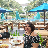

[(709, id    b47a49a2-99a3-4be3-8ed8-991f87c7d2a1
Name: 709, dtype: object), 1]
male


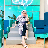

[(710, id    b51e06f8-081d-4f25-8025-a7ac09d830e0
Name: 710, dtype: object), 1]
male


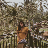

[(711, id    b5d4fb3d-f5bf-4e4d-aeec-2bf96a37af9e
Name: 711, dtype: object), 1]
male


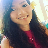

[(712, id    b6136a0c-13cd-4111-b5b8-96ff2085b4c9
Name: 712, dtype: object), 1]
male


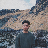

[(713, id    b6d1a05b-52bb-4bf1-9267-7865f53cd8de
Name: 713, dtype: object), 1]
male


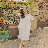

[(714, id    b6ede93c-b6ef-4277-a729-e959e7dd7a06
Name: 714, dtype: object), 1]
male


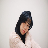

[(715, id    b7e15e6c-399f-4942-8737-fe05f3f85ba0
Name: 715, dtype: object), 0]
female


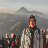

[(716, id    b801ee21-a7aa-4fea-881c-8c06985d9457
Name: 716, dtype: object), 1]
male


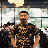

[(717, id    b84e1c7e-6b7e-4c6a-97b9-94fce468a553
Name: 717, dtype: object), 1]
male


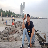

[(718, id    b8585c83-a63d-4966-8c09-99fea51a601b
Name: 718, dtype: object), 1]
male


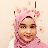

[(719, id    b8dab191-bb3e-4fbf-93f6-6d244c527037
Name: 719, dtype: object), 1]
male


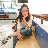

[(720, id    b8e5d583-0043-4d6f-8ce1-c0944df2de55
Name: 720, dtype: object), 0]
female


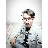

[(721, id    b93afccc-8cd4-40d1-9078-76acefb12645
Name: 721, dtype: object), 1]
male


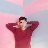

[(722, id    b97f2fe2-d44f-405d-b116-15fa2ce1a88e
Name: 722, dtype: object), 1]
male


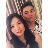

[(723, id    baf100a5-c288-43a3-8342-580fc4ae858e
Name: 723, dtype: object), 0]
female


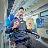

[(724, id    bc1102ce-1f04-4b24-916a-471a2aa96a39
Name: 724, dtype: object), 1]
male


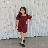

[(725, id    bc7db24a-b476-4c49-882e-42bab20b545e
Name: 725, dtype: object), 1]
male


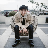

[(726, id    bd09c53b-3230-42f1-9685-863bda85fa70
Name: 726, dtype: object), 1]
male


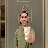

[(727, id    bd318f83-ed55-4513-a82a-f691328ba95b
Name: 727, dtype: object), 1]
male


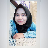

[(728, id    bd3fe834-f7f0-4396-8ce5-8f652a8bb819
Name: 728, dtype: object), 0]
female


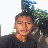

[(729, id    bd5d13ce-f378-4cf7-b495-88b1b323513d
Name: 729, dtype: object), 1]
male


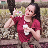

[(730, id    bd6322d7-f1e3-4aa2-81ba-65c756f82d65
Name: 730, dtype: object), 1]
male


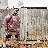

[(731, id    bd8231a5-9ae8-4485-8164-bad1078cecf4
Name: 731, dtype: object), 1]
male


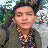

[(732, id    bdb44e14-df58-4e33-885e-77d501fae138
Name: 732, dtype: object), 1]
male


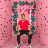

[(733, id    be278ef6-2579-485a-bd65-6e18693c1e2c
Name: 733, dtype: object), 1]
male


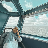

[(734, id    be512e91-c427-49e2-a517-aeab9a05762a
Name: 734, dtype: object), 0]
female


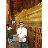

[(735, id    beda023f-2fc4-426f-b3b9-ff32ed886caf
Name: 735, dtype: object), 0]
female


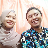

[(736, id    bf6d196b-d691-471f-8cda-c677787baf96
Name: 736, dtype: object), 1]
male


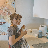

[(737, id    bf7c1ee6-e9a6-4e69-a307-0dbffae69a35
Name: 737, dtype: object), 0]
female


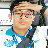

[(738, id    c02afb5b-55f7-407c-a68e-bb119f22283a
Name: 738, dtype: object), 1]
male


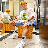

[(739, id    c0301e43-388c-4c1b-98bc-cbd28ef3f3b8
Name: 739, dtype: object), 1]
male


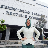

[(740, id    c0446805-48cf-4d5f-a1a7-37a9fb4993c6
Name: 740, dtype: object), 1]
male


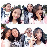

[(741, id    c06e52a7-f703-4b19-865a-c54e4ac94131
Name: 741, dtype: object), 0]
female


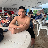

[(742, id    c0b219ef-707e-4b94-8ad8-784cd8abd504
Name: 742, dtype: object), 1]
male


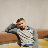

[(743, id    c0d6f234-8460-4417-a84f-919faa18e1f1
Name: 743, dtype: object), 1]
male


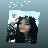

[(744, id    c110d402-da37-42dc-9f7a-c76e91d75b5b
Name: 744, dtype: object), 1]
male


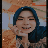

[(745, id    c187e9d0-b11e-4c52-b4ac-866c0ed67f73
Name: 745, dtype: object), 1]
male


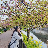

[(746, id    c1c382cf-4cf0-470f-9b30-a253906a331c
Name: 746, dtype: object), 0]
female


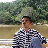

[(747, id    c1d7c676-aaa2-4c06-9962-ab86566017c3
Name: 747, dtype: object), 1]
male


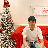

[(748, id    c211e7bb-ac59-41ad-9753-db035748125b
Name: 748, dtype: object), 1]
male


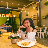

[(749, id    c21337ed-bca6-4eec-ae2f-b979f792b860
Name: 749, dtype: object), 1]
male


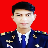

[(750, id    c2155b5f-ec17-4b46-8811-0e005ccefaae
Name: 750, dtype: object), 1]
male


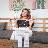

[(751, id    c23b2824-67fa-4330-a9bd-1fe2885c9586
Name: 751, dtype: object), 1]
male


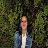

[(752, id    c30c57dd-80ef-4b12-8e2e-81f6648385c7
Name: 752, dtype: object), 1]
male


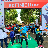

[(753, id    c33ada8e-087c-4b9d-95f0-60b9ea0ebc18
Name: 753, dtype: object), 1]
male


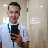

[(754, id    c34e4ce3-05e6-45d0-87b1-eafc3eb3ac98
Name: 754, dtype: object), 1]
male


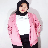

[(755, id    c3872fdc-ec7c-4e51-87ee-82874cd9d6e1
Name: 755, dtype: object), 1]
male


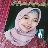

[(756, id    c3be1b3f-9540-4284-95ef-d90af4d6e31b
Name: 756, dtype: object), 1]
male


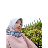

[(757, id    c47c47af-1842-4c27-8d06-27d52d60932f
Name: 757, dtype: object), 0]
female


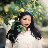

[(758, id    c4a19b50-2971-43ba-80b0-0ed4fd61ded3
Name: 758, dtype: object), 1]
male


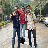

[(759, id    c4bd0c4a-895d-4dd4-b935-ba7b8c9a8eaf
Name: 759, dtype: object), 1]
male


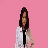

[(760, id    c5205189-b010-4032-a5b6-da4c070d19ca
Name: 760, dtype: object), 0]
female


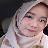

[(761, id    c5310e68-4bd9-4c53-8ece-7085abb860d7
Name: 761, dtype: object), 1]
male


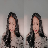

[(762, id    c563feef-64f0-4789-8bd6-abfc59056249
Name: 762, dtype: object), 1]
male


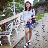

[(763, id    c58c5ac0-757a-4e63-b111-717b5ee2f8c4
Name: 763, dtype: object), 1]
male


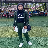

[(764, id    c5e15d76-721e-4706-9727-d773180a473f
Name: 764, dtype: object), 1]
male


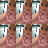

[(765, id    c6241126-792e-4115-a660-941115eb017d
Name: 765, dtype: object), 1]
male


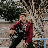

[(766, id    c651d392-1a08-4455-9c2a-52f1cc70afe2
Name: 766, dtype: object), 1]
male


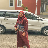

[(767, id    c6c55b35-0149-4930-96f9-12b7d895b859
Name: 767, dtype: object), 1]
male


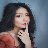

[(768, id    c75900b4-3c64-4cca-8f16-4d70e1f2cb3f
Name: 768, dtype: object), 1]
male


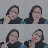

[(769, id    c805fda5-6254-405b-8156-b418a73a414d
Name: 769, dtype: object), 1]
male


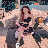

[(770, id    c8d83ab5-7f1f-406f-b4d2-873b3165ac6a
Name: 770, dtype: object), 0]
female


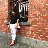

[(771, id    c8e6fd17-5f53-4823-b891-78560426017e
Name: 771, dtype: object), 1]
male


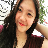

[(772, id    c9c64ecc-63a8-4604-9bcc-08ddb93716ae
Name: 772, dtype: object), 1]
male


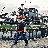

[(773, id    c9fea8fa-a64e-41da-93b4-fe4addecce6d
Name: 773, dtype: object), 1]
male


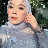

[(774, id    ca3bd8d5-0fc4-4da8-8dcc-4c808a97960c
Name: 774, dtype: object), 0]
female


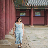

[(775, id    ca875c32-5e25-46f6-8ab8-559f4ba9562c
Name: 775, dtype: object), 1]
male


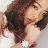

[(776, id    cab5c4a9-8497-4c2f-944b-09d7fa7726a4
Name: 776, dtype: object), 0]
female


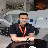

[(777, id    cada9916-b365-4696-beed-2bb9523c8f7f
Name: 777, dtype: object), 0]
female


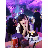

[(778, id    caf6a194-afa4-4515-ad5d-ec1e152a586d
Name: 778, dtype: object), 1]
male


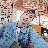

[(779, id    cb08ee33-1250-492f-8267-ec0b47c2223f
Name: 779, dtype: object), 1]
male


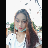

[(780, id    cb1b262d-e2ea-48c7-b6ea-74a11b144bb8
Name: 780, dtype: object), 0]
female


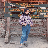

[(781, id    cb1b2f88-a632-47c9-94e3-876157d8d2fa
Name: 781, dtype: object), 0]
female


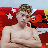

[(782, id    cb39f88c-791c-42d1-8021-cf9d06442d29
Name: 782, dtype: object), 0]
female


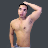

[(783, id    cb4bc8dd-42a9-4ff5-a53f-ebdc4aef6820
Name: 783, dtype: object), 1]
male


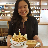

[(784, id    cb7cd53d-a802-4973-a8e8-d5eefa366ca7
Name: 784, dtype: object), 1]
male


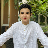

[(785, id    cc296994-0318-4714-9404-0f3bb6651e34
Name: 785, dtype: object), 1]
male


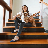

[(786, id    cc6d921e-ec44-4a07-8097-a951d40ad568
Name: 786, dtype: object), 1]
male


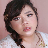

[(787, id    ccaf1f2d-2bbc-440e-add3-f393e1606581
Name: 787, dtype: object), 1]
male


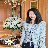

[(788, id    cda4fb9b-f8fc-43ca-af74-ef359456d4f9
Name: 788, dtype: object), 0]
female


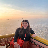

[(789, id    cdb0d9b6-ba8f-4a67-a89f-ef7ea4af74f4
Name: 789, dtype: object), 1]
male


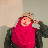

[(790, id    cdba6fff-fcf0-422f-b85a-3f5b613d31fb
Name: 790, dtype: object), 1]
male


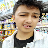

[(791, id    cdbe5bd4-1e79-4e27-9173-a004af34cd7d
Name: 791, dtype: object), 1]
male


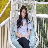

[(792, id    ce423c1f-9fd2-4658-930d-9efd67e5b6ce
Name: 792, dtype: object), 1]
male


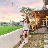

[(793, id    ce726853-a524-4126-8f47-317c84be6d6f
Name: 793, dtype: object), 1]
male


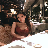

[(794, id    ce7f445f-7131-4859-b9e6-a8d8aecd614a
Name: 794, dtype: object), 1]
male


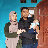

[(795, id    cef0bc22-7164-40b7-90a8-e6eea61d5dab
Name: 795, dtype: object), 1]
male


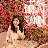

[(796, id    cf0ce2f3-77c5-4727-a406-7ea62c8dcce6
Name: 796, dtype: object), 1]
male


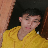

[(797, id    cf0fbed5-ac94-4c0c-aaf8-03d30bbeb601
Name: 797, dtype: object), 1]
male


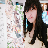

[(798, id    cf31e588-c78d-42c8-bece-4cbd9c65fc78
Name: 798, dtype: object), 0]
female


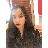

[(799, id    cfb237fb-525c-4f01-ad8d-9b3ad9e09c75
Name: 799, dtype: object), 1]
male


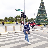

[(800, id    cfb72c84-66d0-439d-ba00-1e5aa54d8758
Name: 800, dtype: object), 0]
female


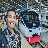

[(801, id    d01e33eb-726d-4092-975b-eaaab9d10363
Name: 801, dtype: object), 1]
male


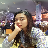

[(802, id    d0239e94-6425-482f-9bb4-915ba42026db
Name: 802, dtype: object), 0]
female


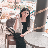

[(803, id    d023c028-d11b-4761-b501-6211d2143297
Name: 803, dtype: object), 0]
female


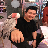

[(804, id    d04f9b15-ac71-4773-9f64-168e7f60ace7
Name: 804, dtype: object), 0]
female


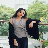

[(805, id    d07e9e4f-2c8c-4c38-a9ce-fc856104078a
Name: 805, dtype: object), 1]
male


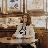

[(806, id    d1161124-157e-459a-8862-ae1542dbf0f9
Name: 806, dtype: object), 1]
male


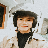

[(807, id    d13eaed8-3ad3-4dee-8a2d-e06540e48ead
Name: 807, dtype: object), 1]
male


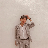

[(808, id    d14e8cff-0642-4b09-83aa-c79490fbc9c3
Name: 808, dtype: object), 0]
female


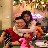

[(809, id    d1951245-5db2-45af-a01a-b11d492fdbbd
Name: 809, dtype: object), 1]
male


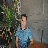

[(810, id    d24f743e-361e-40f5-a638-c6779c99e03b
Name: 810, dtype: object), 1]
male


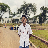

[(811, id    d2a45709-6780-4633-8503-35f01acb30e1
Name: 811, dtype: object), 0]
female


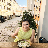

[(812, id    d34efe08-7b87-4c67-9343-9d398b56d0f8
Name: 812, dtype: object), 1]
male


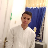

[(813, id    d35f885b-d708-4117-9999-570dd35d588a
Name: 813, dtype: object), 1]
male


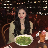

[(814, id    d3bcbc44-db08-4382-aa52-43fa8c79f748
Name: 814, dtype: object), 1]
male


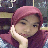

[(815, id    d4877345-c14d-4158-864b-08f743e74ab0
Name: 815, dtype: object), 0]
female


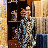

[(816, id    d4a40c99-e06e-47bb-9c1c-ebb40c9d7312
Name: 816, dtype: object), 1]
male


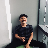

[(817, id    d4dcee67-b1f5-4569-8a2a-602eb355407b
Name: 817, dtype: object), 1]
male


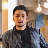

[(818, id    d4e6e875-bbba-4121-975a-7f9b0d30b369
Name: 818, dtype: object), 0]
female


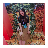

[(819, id    d50fcefa-c5ac-471f-9bee-a4140990ad31
Name: 819, dtype: object), 1]
male


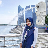

[(820, id    d54e0974-5e72-4384-9ded-0f75abfa9939
Name: 820, dtype: object), 0]
female


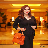

[(821, id    d5f83a8f-5040-4416-a6dd-ce3c3f7a0a71
Name: 821, dtype: object), 1]
male


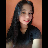

[(822, id    d6157bca-f183-4a29-9927-e1953c1116f1
Name: 822, dtype: object), 1]
male


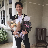

[(823, id    d62470bd-176b-4b2e-9429-e0be0be99c81
Name: 823, dtype: object), 1]
male


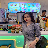

[(824, id    d69623ab-2a59-4f9d-8cc3-214dc015984c
Name: 824, dtype: object), 1]
male


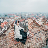

[(825, id    d6d9e90f-1068-415d-b3f5-bbd33adac831
Name: 825, dtype: object), 0]
female


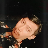

[(826, id    d6f1e82a-e6ae-4ecb-bab0-7182942e082b
Name: 826, dtype: object), 1]
male


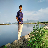

[(827, id    d73c3665-0998-4bee-b926-e747c689aea3
Name: 827, dtype: object), 0]
female


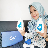

[(828, id    d7df6c0f-afd4-4e9d-b089-5062bb06d41f
Name: 828, dtype: object), 0]
female


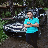

[(829, id    d82aabd2-3bf9-452a-95f3-9f42a0d81ab7
Name: 829, dtype: object), 1]
male


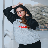

[(830, id    d89cbc69-8194-408d-a529-bb2607c81b2a
Name: 830, dtype: object), 1]
male


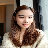

[(831, id    d92db917-3602-4d5b-9121-491ae0dd8507
Name: 831, dtype: object), 1]
male


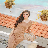

[(832, id    d9bc8c3f-d39c-48f8-a00f-ee0bed848146
Name: 832, dtype: object), 0]
female


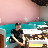

[(833, id    da07dab6-4f1b-4566-8502-b29e63ba450c
Name: 833, dtype: object), 1]
male


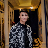

[(834, id    da864d23-72d5-493b-a86d-b7496da194d0
Name: 834, dtype: object), 0]
female


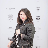

[(835, id    da959e6a-362e-4d81-9ee3-24b29cecafde
Name: 835, dtype: object), 0]
female


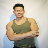

[(836, id    dae9bea8-b2b4-4232-813b-0ee1d8813beb
Name: 836, dtype: object), 1]
male


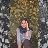

[(837, id    db0cf991-0fee-4183-bae7-328da66dcb09
Name: 837, dtype: object), 1]
male


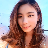

[(838, id    db405d01-f0ac-4c41-86e2-b1ca5be92036
Name: 838, dtype: object), 1]
male


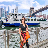

[(839, id    dbb03748-4ce0-4d94-af0c-8c1a41b00491
Name: 839, dtype: object), 0]
female


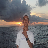

[(840, id    dbbb414f-f6ba-4c01-939d-043e539434e1
Name: 840, dtype: object), 1]
male


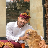

[(841, id    dbdb43e7-4c18-4ca8-a2f1-1b71fcf25f63
Name: 841, dtype: object), 1]
male


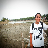

[(842, id    dbe75db0-de30-4c7b-b563-d6533597e3b5
Name: 842, dtype: object), 0]
female


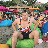

[(843, id    dbf6d3a2-ab29-4c81-8b37-ace40a91e0e6
Name: 843, dtype: object), 1]
male


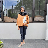

[(844, id    dc1a5a15-be4e-4c1e-9969-1488564c9a4f
Name: 844, dtype: object), 0]
female


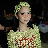

[(845, id    dc3d8482-5752-400c-8c28-c776eafdf29c
Name: 845, dtype: object), 1]
male


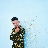

[(846, id    dc9c5a4d-1a2e-44c6-b822-2c00619bc8d2
Name: 846, dtype: object), 1]
male


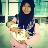

[(847, id    dcb1516e-b9d7-4287-8854-c13401fe17f3
Name: 847, dtype: object), 1]
male


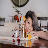

[(848, id    dcf44795-36b9-4fd8-9b36-3a10ce1cfdc7
Name: 848, dtype: object), 0]
female


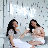

[(849, id    dd3c946d-3cf8-4288-a71e-bafd7e6d0207
Name: 849, dtype: object), 1]
male


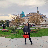

[(850, id    dd7e02da-2bcf-4f85-91fd-d38edd27b623
Name: 850, dtype: object), 0]
female


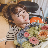

[(851, id    ddb826a5-db7d-47a5-9cbf-0fd7dd513509
Name: 851, dtype: object), 0]
female


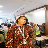

[(852, id    ddb9268f-57c2-4aba-a4f6-46a4a3567156
Name: 852, dtype: object), 1]
male


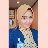

[(853, id    dde70b10-6db5-43f7-9e4c-35bbe5202382
Name: 853, dtype: object), 1]
male


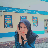

[(854, id    de7bd6ab-2c2f-49fa-92c2-11346f619fde
Name: 854, dtype: object), 1]
male


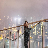

[(855, id    df06f384-09e1-4085-890f-6289f1e5d03a
Name: 855, dtype: object), 0]
female


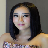

[(856, id    df198bbc-9513-443f-92bb-700d07c34042
Name: 856, dtype: object), 0]
female


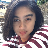

[(857, id    df8b8f85-66ae-4a6e-bcfa-15afdda8feac
Name: 857, dtype: object), 1]
male


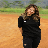

[(858, id    df9bd8ef-ba15-4956-ae99-e3c5b43d9663
Name: 858, dtype: object), 0]
female


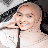

[(859, id    dfce3ad5-1f61-4c14-8303-ab858404640b
Name: 859, dtype: object), 1]
male


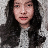

[(860, id    dfe8a733-f375-428a-ba5c-704a3d7ceea7
Name: 860, dtype: object), 1]
male


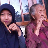

[(861, id    e0361fcc-b488-4638-979b-ca40f795e71f
Name: 861, dtype: object), 1]
male


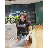

[(862, id    e060046a-0d01-40a0-97c6-338204da9c2b
Name: 862, dtype: object), 1]
male


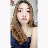

[(863, id    e09ead9e-9796-4182-9dba-614ab9a177a4
Name: 863, dtype: object), 0]
female


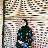

[(864, id    e10b6596-133f-4057-8b40-78f022ba3053
Name: 864, dtype: object), 1]
male


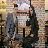

[(865, id    e12e66e8-5c8b-484b-a015-4249d03c55e4
Name: 865, dtype: object), 1]
male


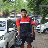

[(866, id    e1461764-21c4-4c69-9b8c-7520bdd15403
Name: 866, dtype: object), 1]
male


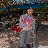

[(867, id    e1501198-aecc-480d-97f5-4d388b41ddbe
Name: 867, dtype: object), 1]
male


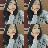

[(868, id    e15375bd-4e9c-44f1-bdb6-cb4fddd9a60a
Name: 868, dtype: object), 0]
female


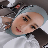

[(869, id    e1a2ace4-a218-435e-b2ae-7f686ffd3f52
Name: 869, dtype: object), 1]
male


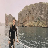

[(870, id    e1e0b34d-295e-4a01-b6de-e769da335068
Name: 870, dtype: object), 1]
male


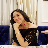

[(871, id    e1e9434d-25c6-47bb-98e1-6c6020c58855
Name: 871, dtype: object), 1]
male


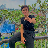

[(872, id    e224d1e8-ca69-4d63-9754-1b2d4fbd73e4
Name: 872, dtype: object), 1]
male


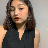

[(873, id    e24d6dc7-7795-44c6-a008-6b2a137dfc1b
Name: 873, dtype: object), 1]
male


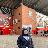

[(874, id    e2b5886f-7e3e-416a-b5b6-0dcf2809bc0e
Name: 874, dtype: object), 1]
male


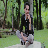

[(875, id    e2b84d8a-97fc-4fcb-8b04-2698111efef9
Name: 875, dtype: object), 1]
male


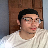

[(876, id    e2d6914c-2226-4239-86d4-43872a543175
Name: 876, dtype: object), 1]
male


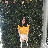

[(877, id    e2d6e42b-ee4d-4850-bf58-8cc67bf0a47f
Name: 877, dtype: object), 1]
male


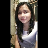

[(878, id    e2ea4001-fee2-415f-bcb5-7b5c67a2aec2
Name: 878, dtype: object), 0]
female


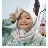

[(879, id    e3111b20-09c7-4a82-aebf-7a48b59cfacf
Name: 879, dtype: object), 0]
female


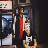

[(880, id    e31e675a-aec6-417b-8e72-74a67764375c
Name: 880, dtype: object), 1]
male


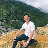

[(881, id    e33ab631-f8a0-42ce-b342-e5553f54f9ee
Name: 881, dtype: object), 1]
male


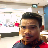

[(882, id    e33cab5b-87c6-4c4b-94c7-a815ace25bc5
Name: 882, dtype: object), 1]
male


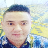

[(883, id    e3548568-1839-48f7-8054-dc087de09299
Name: 883, dtype: object), 0]
female


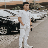

[(884, id    e37b3837-805d-4676-9c43-9bfff37b3a85
Name: 884, dtype: object), 1]
male


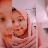

[(885, id    e38826cb-32b4-4a23-a958-1e48fb50eee0
Name: 885, dtype: object), 1]
male


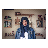

[(886, id    e38e63b8-15d8-4902-ab6b-0c8e00b4a1dc
Name: 886, dtype: object), 0]
female


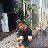

[(887, id    e3af2ad1-8505-4d9e-bdc8-2f244bd19bce
Name: 887, dtype: object), 1]
male


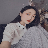

[(888, id    e423a4ff-fb85-4a0a-bcd5-767cfec8e779
Name: 888, dtype: object), 0]
female


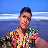

[(889, id    e4abdbe0-baa1-40ce-b1f3-4151d5dc2063
Name: 889, dtype: object), 1]
male


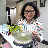

[(890, id    e4ce44cf-0b67-42a4-a00c-9e7b075736b8
Name: 890, dtype: object), 1]
male


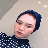

[(891, id    e531a359-e493-45a9-bbc2-12d97e18b4df
Name: 891, dtype: object), 1]
male


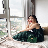

[(892, id    e581060f-98ba-47a1-9d9b-ad8574a86b0f
Name: 892, dtype: object), 0]
female


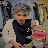

[(893, id    e5d168aa-847e-40f4-9294-c35b33e1b374
Name: 893, dtype: object), 1]
male


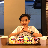

[(894, id    e64088e1-e332-4742-8b97-a56c3e6664fe
Name: 894, dtype: object), 1]
male


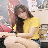

[(895, id    e64846a3-c3b0-4491-a380-6227da89f4dd
Name: 895, dtype: object), 0]
female


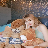

[(896, id    e65c0786-da57-46fa-9857-4ab9850b7df3
Name: 896, dtype: object), 0]
female


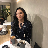

[(897, id    e690ac49-9403-417b-9793-191d9d151829
Name: 897, dtype: object), 0]
female


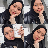

[(898, id    e6b26180-5f1a-486a-92c6-736461d9064f
Name: 898, dtype: object), 0]
female


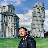

[(899, id    e6e048f3-227e-4ad5-9228-9431100cd531
Name: 899, dtype: object), 0]
female


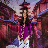

[(900, id    e738ee38-057a-4eb2-95c3-a85385f39e9a
Name: 900, dtype: object), 0]
female


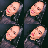

[(901, id    e75b0079-7d36-40ce-880f-e3826725491d
Name: 901, dtype: object), 1]
male


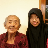

[(902, id    e7c16c5a-1aa4-4867-9360-5bb7f7cc0551
Name: 902, dtype: object), 1]
male


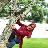

[(903, id    e854e461-2a73-472c-b816-d09ea2464e34
Name: 903, dtype: object), 1]
male


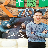

[(904, id    e89840ef-25e1-4088-9c95-d7dc23d52924
Name: 904, dtype: object), 1]
male


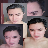

[(905, id    e904108c-f0e6-440a-bc92-7dc5aa23fa4b
Name: 905, dtype: object), 1]
male


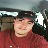

[(906, id    e97aa3c9-3a2c-4e6a-8302-136eb23693ef
Name: 906, dtype: object), 0]
female


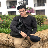

[(907, id    e9d11e94-ed23-4251-bc16-d36f4dbc1122
Name: 907, dtype: object), 1]
male


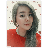

[(908, id    e9fcbd5a-27d6-449c-9c65-ef97d470f67c
Name: 908, dtype: object), 1]
male


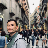

[(909, id    eaa5af69-58aa-4ac4-b7f6-f509fa5adb83
Name: 909, dtype: object), 1]
male


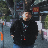

[(910, id    eaffaea8-6776-4391-ac87-14d65f0349b0
Name: 910, dtype: object), 1]
male


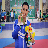

[(911, id    ec5c3012-6a43-4334-9ba3-893994e14b99
Name: 911, dtype: object), 1]
male


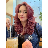

[(912, id    ec6a401d-6ea1-43fa-bd19-58a3302ae5ec
Name: 912, dtype: object), 1]
male


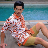

[(913, id    ec6c99cb-b870-4811-bfe1-b31c92cad730
Name: 913, dtype: object), 1]
male


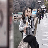

[(914, id    ec8bac36-5936-4758-9239-255b27121224
Name: 914, dtype: object), 1]
male


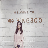

[(915, id    ed53c463-126e-433f-9a24-1fadca77331c
Name: 915, dtype: object), 1]
male


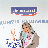

[(916, id    edebf522-eaa8-4020-be27-b91df10ba71e
Name: 916, dtype: object), 1]
male


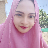

[(917, id    edec7e89-a51d-4cb9-beb7-34844b257ab8
Name: 917, dtype: object), 0]
female


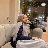

[(918, id    ee183d6a-4e35-4152-897f-e2d02428f9bc
Name: 918, dtype: object), 1]
male


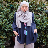

[(919, id    ee2ff643-0bc6-438b-91e7-1f1e391e0633
Name: 919, dtype: object), 1]
male


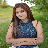

[(920, id    ee43f2c7-6941-470a-afc8-8354a6340ca0
Name: 920, dtype: object), 0]
female


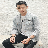

[(921, id    ee697885-d5d5-45c0-9af2-2d644cd268f0
Name: 921, dtype: object), 1]
male


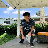

[(922, id    ee941f35-9fae-421a-9c0d-e27e943d3516
Name: 922, dtype: object), 1]
male


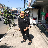

[(923, id    ef2e9976-4b80-482a-9781-60ccb050e4e4
Name: 923, dtype: object), 1]
male


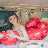

[(924, id    efbb4727-1102-42fd-b4c4-030196674601
Name: 924, dtype: object), 1]
male


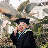

[(925, id    efbe544a-9fee-444d-a076-dbfb1c998644
Name: 925, dtype: object), 1]
male


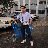

[(926, id    efdd1356-566f-45d5-85dd-05dcb2ad9d28
Name: 926, dtype: object), 1]
male


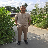

[(927, id    f0303a1d-2faf-490b-b264-78dc210b5d0a
Name: 927, dtype: object), 1]
male


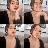

[(928, id    f037b084-cdd1-43ec-9257-b99673539e19
Name: 928, dtype: object), 1]
male


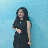

[(929, id    f03c139c-8406-443c-adc3-31522c5920ed
Name: 929, dtype: object), 0]
female


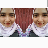

[(930, id    f048a4c4-b02a-4587-a304-794ad165b70f
Name: 930, dtype: object), 1]
male


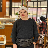

[(931, id    f09daf6c-0f98-450a-ba13-5097b0ac4b26
Name: 931, dtype: object), 1]
male


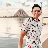

[(932, id    f0a38a27-450c-40a8-b9fe-7bf013ab65c7
Name: 932, dtype: object), 1]
male


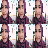

[(933, id    f0fd3137-0482-46a4-b69a-4cb97fce2ad7
Name: 933, dtype: object), 1]
male


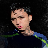

[(934, id    f1419c21-3ec4-4453-a298-db352dc3f13f
Name: 934, dtype: object), 1]
male


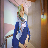

[(935, id    f25b4a29-2cd8-4f31-976c-b019888de2a8
Name: 935, dtype: object), 0]
female


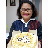

[(936, id    f26073d4-e789-43c7-8800-1020e2556714
Name: 936, dtype: object), 1]
male


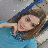

[(937, id    f27939ba-44c6-4693-94f8-17f05f4b3765
Name: 937, dtype: object), 1]
male


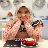

[(938, id    f2e9715d-2485-4d0c-8a07-ed967e10fc88
Name: 938, dtype: object), 1]
male


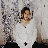

[(939, id    f3336a0f-1e54-4bce-adf4-b97d3fa43f14
Name: 939, dtype: object), 0]
female


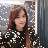

[(940, id    f34b6072-8d7d-4c5e-bdbd-c2c28c8045c6
Name: 940, dtype: object), 1]
male


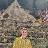

[(941, id    f351ad39-1aa7-4167-bc20-a64d5213582c
Name: 941, dtype: object), 0]
female


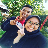

[(942, id    f36809ab-77cf-4ed9-8d20-d16a3a96ef0e
Name: 942, dtype: object), 0]
female


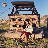

[(943, id    f37870b1-97ef-4779-93a3-d8f329715a30
Name: 943, dtype: object), 1]
male


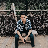

[(944, id    f3cf4b88-4abf-4872-851c-d2ec59ffbd41
Name: 944, dtype: object), 1]
male


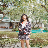

[(945, id    f3d8b8c8-a97b-4990-88d6-48d6c6a07708
Name: 945, dtype: object), 0]
female


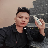

[(946, id    f438c3bc-a3a9-4eb6-bf43-fe74e7870b7c
Name: 946, dtype: object), 1]
male


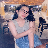

[(947, id    f4eaf67f-3a06-4aea-9703-4bdd5b3c2efd
Name: 947, dtype: object), 1]
male


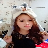

[(948, id    f4f448e1-67b0-481d-b4fc-986e88dc3b89
Name: 948, dtype: object), 1]
male


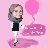

[(949, id    f5535a90-35cf-4580-a7f9-585be9fee0f0
Name: 949, dtype: object), 0]
female


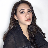

[(950, id    f5782d36-a401-4628-b07d-705db078c2a2
Name: 950, dtype: object), 1]
male


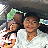

[(951, id    f5ce06a7-1a97-48f6-bf6a-8eca44c10890
Name: 951, dtype: object), 1]
male


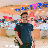

[(952, id    f5d0e0c5-7232-4bc4-9625-198762c3c1e4
Name: 952, dtype: object), 1]
male


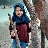

[(953, id    f5d61936-3a4f-46fa-8475-68419531587d
Name: 953, dtype: object), 1]
male


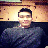

[(954, id    f62d1642-3ab7-4e65-8031-32bc7964d98e
Name: 954, dtype: object), 1]
male


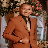

[(955, id    f7387fc2-0e30-480c-afc3-312fccf70d6e
Name: 955, dtype: object), 1]
male


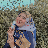

[(956, id    f77c0c15-7dec-4cfe-bbb7-be272088d1a5
Name: 956, dtype: object), 1]
male


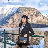

[(957, id    f78ea0d4-2da2-4c7c-a51b-8e9b9cbd4d25
Name: 957, dtype: object), 1]
male


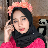

[(958, id    f7b6cc86-21f8-4e8f-84e0-0cd6cc468774
Name: 958, dtype: object), 1]
male


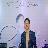

[(959, id    f7bf6462-eaa6-48bd-9670-6b88aca08bc9
Name: 959, dtype: object), 0]
female


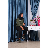

[(960, id    f7ca8033-70eb-48f2-a38f-2eec04eebe0a
Name: 960, dtype: object), 0]
female


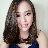

[(961, id    f7f81891-77d2-4e41-b249-92abcd4ee39a
Name: 961, dtype: object), 1]
male


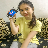

[(962, id    f8288654-11a7-404b-b7d3-4e26e38fe78e
Name: 962, dtype: object), 1]
male


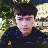

[(963, id    f88018f8-f4f4-4273-89d1-2c629a52ce09
Name: 963, dtype: object), 1]
male


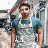

[(964, id    f896a422-8981-4766-880f-8f7ff6f6c06c
Name: 964, dtype: object), 1]
male


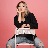

[(965, id    f8c08272-02b2-4a69-9231-2e34d4ac7a24
Name: 965, dtype: object), 1]
male


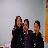

[(966, id    f8e25cc7-0120-496a-89dd-ab879a8714a1
Name: 966, dtype: object), 1]
male


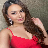

[(967, id    f8f0c9ba-4648-4a5c-811b-2e96fb47fd1f
Name: 967, dtype: object), 1]
male


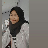

[(968, id    f9078fda-b5f8-462a-b5b3-c5e6c735d0ab
Name: 968, dtype: object), 0]
female


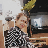

[(969, id    f91dac10-8cb6-47d4-87cd-e2de972ec9f7
Name: 969, dtype: object), 0]
female


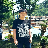

[(970, id    f9a4f79d-ec18-4bf1-9eaa-ea46252ac011
Name: 970, dtype: object), 1]
male


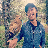

[(971, id    f9f238be-038b-4fcf-aaff-971e3e0c4fc9
Name: 971, dtype: object), 1]
male


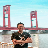

[(972, id    f9fd2fd7-3692-42d1-8294-ef14b1347757
Name: 972, dtype: object), 0]
female


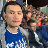

[(973, id    f9fe6aae-a26d-4c63-afeb-e6740ceec7f0
Name: 973, dtype: object), 1]
male


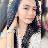

[(974, id    fa50b224-fef8-4a99-96ba-d7c31e525aaf
Name: 974, dtype: object), 1]
male


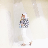

[(975, id    fa754362-d115-4fe4-afb6-bb1d008157e8
Name: 975, dtype: object), 0]
female


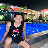

[(976, id    faa77d1f-16d7-45f0-91f6-c616dcdaa459
Name: 976, dtype: object), 0]
female


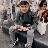

[(977, id    fab160f7-c91e-4d97-acdb-3597c42f787e
Name: 977, dtype: object), 1]
male


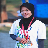

[(978, id    fc8b178b-2ab5-4533-a2a6-28e0cce45814
Name: 978, dtype: object), 1]
male


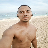

[(979, id    fcccfaae-c683-4188-a070-14b3eeeee9a5
Name: 979, dtype: object), 1]
male


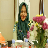

[(980, id    fd0454f4-ae8b-417a-beaf-45a1002e13bb
Name: 980, dtype: object), 0]
female


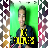

[(981, id    fd384898-4b24-43b2-8bcb-1a631c0798a5
Name: 981, dtype: object), 1]
male


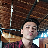

[(982, id    fd69957a-1034-44f5-a01e-ee1e237bbc8e
Name: 982, dtype: object), 1]
male


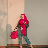

[(983, id    fd8a6fa7-5c8d-4e48-82e1-44df55270cd0
Name: 983, dtype: object), 1]
male


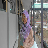

[(984, id    fde467de-6027-45e6-9ff8-67820550314a
Name: 984, dtype: object), 1]
male


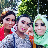

[(985, id    feb9e70f-4182-4500-866d-9b95657e727c
Name: 985, dtype: object), 1]
male


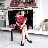

[(986, id    fed67ed2-620a-4ebf-b61e-16ef3d9b93f7
Name: 986, dtype: object), 0]
female


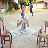

[(987, id    ff14c77e-c3c2-46db-9341-30de4130ef8a
Name: 987, dtype: object), 1]
male


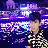

[(988, id    ff662f3f-8c76-4d27-a73e-c43c4353f798
Name: 988, dtype: object), 1]
male


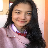

[(989, id    ffa30e4a-c056-4a2d-8c63-d266810d0791
Name: 989, dtype: object), 0]
female


In [3]:
#test
import csv
import cv2
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import keras

testing = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/submission.csv')
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/sex_model')
src = "/content/drive/My Drive/Colab Notebooks/Data/Testing/"
f=open('/content/drive/My Drive/Colab Notebooks/result.csv',"w")
writer=csv.writer(f,delimiter=",")
writer.writerow(["id", "jenis kelamin"])
for filee in testing.iterrows():

  img = image.load_img(src+filee[1][0]+".jpg",target_size=(128,128))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes=model.predict(images)
  image_cv2 = cv2.imread(src+filee[1][0]+".jpg")
  image_cv2 = cv2.resize(image_cv2,(48,48))
  cv2_imshow(image_cv2)
  result=np.round(classes)
  result = int(result)
  print([filee,result])
  writer.writerow([filee[1][0],result])
  
  if(result==1):
    print("male")
  else:
    print("female")
f.close()
  

In [ ]:
#check the format
import pandas as pd
result= pd.read_csv('/content/drive/My Drive/Colab Notebooks/result.csv')
format =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/submission.csv')
result_arr=[]
format_arr=[]
for i in result.iterrows():
  result_arr.append(i[1][0])

for i in format.iterrows():
  format_arr.append(i[1][0])
if(result_arr==format_arr):
  print("yey")
else:
  print("sigh")

yey


In [ ]:
import csv

header = ['name', 'area', 'country_code2', 'country_code3']
data = ['Afghanistan', 652090, 'AF', 'AFG']


 writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    writer.writerow(data)

In [ ]:
import pandas as pd
training_set=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/train.csv',delimiter=',')

for row in training_set.iterrows():
  print(row[1][0],end=" ") #urutan
  print(row[1][1],end=" ") #gender
  print(row[1][2]) #age